<a href="https://colab.research.google.com/github/pinpan123/MS-Engage/blob/main/Automotive_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# importing necessary libraries
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl # importing library to change the default setting
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization on top of matplotlib

In [90]:
%matplotlib inline
import imp
import warnings
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
from tqdm import tqdm
warnings.filterwarnings('ignore')

##Loading data and looking at its shape shape, info, statistical summary etc.


In [91]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving Automation dataset.xlsx to Automation dataset (2).xlsx


In [92]:
df=pd.read_excel('Automation dataset.xlsx')

#Data Cleaning

In [93]:
df.shape

(1276, 141)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(7), object(134)
memory usage: 1.4+ MB


In [95]:
df.head()

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder              Drivetrain Cylinder_Configuration Emission_Norm   Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors    City_Mileage Highway_Mileage ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG Kerb_Weight Gears Ground_Clearance Front_Brakes Rear_Brakes                                   Front_Suspension                                    Rear_Suspension Front_Track Rear_Track Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows Power_Seats Keyless_Entry         Power        Torque Odometer Speedometer    Tachometer Tripmeter  Seating_Capacity Seats_Material       Type Wheelbase Wheels_Size  ... Voice_Recognition Walk_Away_Auto_Car_Lock ABS_(Anti-lock_Braking_System) Headlight_Reminder Adjustable_Headrests Gross_Vehicle_Weight Airbags Door_Ajar_Warning EBD_(Electronic_Brake-force_Distribution)  \
0         0.0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)                In-line         BS IV  Rear, Transverse   Injection          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre             NaN          23.6 km/litre                            NaN      660 kg   4.0           180 mm         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm        135/70R12       155/65R12  Electric Power  Only Front Windows         NaN        Remote  38PS@5500rpm  51Nm@4000rpm  Digital      Analog  Not on offer       Yes               4.0         Fabric     Manual   2230 mm    4 B X 12  ...               NaN                     NaN                            NaN                NaN                  NaN                  NaN     NaN               NaN                                       NaN   
1         1.0  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)                In-line         BS IV  Rear, Transverse   Injection          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre             NaN          23.6 km/litre                            NaN      725 kg   4.0           180 mm         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm        135/70R12       155/65R12             NaN                 NaN         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog  Not on offer       Yes               4.0         Fabric     Manual   2230 mm    4 B X 12  ...               NaN                     NaN                            NaN                NaN                  NaN                  NaN     NaN               NaN                                       NaN   
2         2.0  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)                In-line         BS IV  Rear, Transverse   Injection          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0             NaN             NaN                    NaN                       36 km/kg      710 kg   4.0           180 mm         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm        135/70R12       155/65R12  Electric Power                 NaN         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog  Not on offer       Yes               4.0         Fabric     Manual   2230 mm    4 B X 12  ...               NaN                     NaN                            NaN                NaN                  NaN                  NaN     NaN               NaN                                       NaN   
3         3.0  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc 

In [96]:
df.isnull().sum()


Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [97]:
df=df.drop(['Leather_Wrapped_Steering', 'Automatic_Headlamps'], axis=1)

In [98]:
df.shape

(1276, 139)

In [99]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 139, dtype: int64

In [100]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]

In [101]:
df.describe(empty_cols)

Unnamed: 0    Cylinders  Valves_Per_Cylinder        Doors  Seating_Capacity  Number_of_Airbags  USB_Ports
count  1276.000000  1210.000000          1174.000000  1272.000000       1270.000000        1141.000000  29.000000
mean    637.500000     4.380992             3.977853     4.550314          5.270079           3.787029   1.793103
std     368.493781     1.660957             0.833763     0.747816          1.145231           2.522399   0.773642
min       0.000000     2.000000             1.000000     2.000000          2.000000           1.000000   1.000000
50%     637.500000     4.000000             4.000000     5.000000          5.000000           2.000000   2.000000
max    1275.000000    16.000000            16.000000     5.000000         16.000000          14.000000   3.000000

In [102]:
df.dtypes

Unnamed: 0           float64
Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 139, dtype: object

In [103]:
df['Engine_Type'].describe()

count                             34
unique                            11
top       Revotron 1.2 L, BS6 Engine
freq                               6
Name: Engine_Type, dtype: object

In [104]:
df=df.drop(['Unnamed: 0'], axis=1)

In [105]:
df.shape

(1276, 138)

In [106]:
df.dtypes

Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 138, dtype: object

In [107]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 138, dtype: int64

In [108]:
df=df.drop(['Welcome_Lights', 'Heads-Up_Display'], axis=1)

In [109]:
df.shape

(1276, 136)

In [110]:
df.head()

Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder              Drivetrain Cylinder_Configuration Emission_Norm   Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors    City_Mileage Highway_Mileage ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG Kerb_Weight Gears Ground_Clearance Front_Brakes Rear_Brakes                                   Front_Suspension                                    Rear_Suspension Front_Track Rear_Track Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows Power_Seats Keyless_Entry         Power        Torque Odometer Speedometer    Tachometer Tripmeter  Seating_Capacity Seats_Material       Type Wheelbase Wheels_Size Start_/_Stop_Button  ... High_Speed_Alert_System Lane_Watch_Camera/_Side_Mirror_Camera Passenger_Side_Seat-Belt_Reminder Seat_Back_Pockets Voice_Recognition Walk_Away_Auto_Car_Lock ABS_(Anti-lock_Braking_System) Headlight_Reminder  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)                In-line         BS IV  Rear, Transverse   Injection          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre             NaN          23.6 km/litre                            NaN      660 kg   4.0           180 mm         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm        135/70R12       155/65R12  Electric Power  Only Front Windows         NaN        Remote  38PS@5500rpm  51Nm@4000rpm  Digital      Analog  Not on offer       Yes               4.0         Fabric     Manual   2230 mm    4 B X 12                 Yes  ...                     NaN                                   NaN                               NaN               NaN               NaN                     NaN                            NaN                NaN   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)                In-line         BS IV  Rear, Transverse   Injection          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre             NaN          23.6 km/litre                            NaN      725 kg   4.0           180 mm         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm        135/70R12       155/65R12             NaN                 NaN         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog  Not on offer       Yes               4.0         Fabric     Manual   2230 mm    4 B X 12                 NaN  ...                     NaN                                   NaN                               NaN               NaN               NaN                     NaN                            NaN                NaN   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)                In-line         BS IV  Rear, Transverse   Injection          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0             NaN             NaN                    NaN                       36 km/kg      710 kg   4.0           180 mm         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm        135/70R12       155/65R12  Electric Power                 NaN         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog  Not on offer       Yes               4.0         Fabric     Manual   2230 mm    4 B X 12                 NaN  ...                     NaN                                   NaN                               NaN               NaN               NaN                     NaN                            NaN                NaN   
3  Tata  Nano Genx     

In [111]:
df=df.dropna(axis=0, how='any', subset= ['Make','Displacement'] )

In [112]:
df.shape

(1190, 136)

In [113]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [114]:
df.isnull().sum()

Make                                            0
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                    0
Cylinders                                      55
Valves_Per_Cylinder                            89
Drivetrain                                      6
Cylinder_Configuration                          9
Emission_Norm                                  10
Engine_Location                                40
Fuel_System                                     7
Fuel_Tank_Capacity                             59
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4
City_Mileage                                  521


In [115]:
df.dtypes

Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        f

In [116]:
df['Cylinders'].fillna(int(df['Cylinders'].mean()), inplace=True)
print(df)

            Make      Model        Variant Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain Cylinder_Configuration Emission_Norm      Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors    City_Mileage Highway_Mileage ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG Kerb_Weight Gears Ground_Clearance     Front_Brakes      Rear_Brakes                                   Front_Suspension                                    Rear_Suspension Front_Track Rear_Track Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows Power_Seats Keyless_Entry          Power         Torque Odometer      Speedometer    Tachometer Tripmeter  Seating_Capacity Seats_Material       Type Wheelbase Wheels_Size Start_/_Stop_Button 12v_Power_Outlet                   Audiosystem Aux-in_Compatibility Average_Fuel_Consumption                                     Basic_Warranty Bluetooth        Boot-lid_Opener  \
0   

In [117]:
df.head

<bound method NDFrame.head of             Make      Model        Variant Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain Cylinder_Configuration Emission_Norm      Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors    City_Mileage Highway_Mileage ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG Kerb_Weight Gears Ground_Clearance     Front_Brakes      Rear_Brakes                                   Front_Suspension                                    Rear_Suspension Front_Track Rear_Track Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows Power_Seats Keyless_Entry          Power         Torque Odometer      Speedometer    Tachometer Tripmeter  Seating_Capacity Seats_Material       Type Wheelbase Wheels_Size Start_/_Stop_Button 12v_Power_Outlet                   Audiosystem Aux-in_Compatibility Average_Fuel_Consumption                                     Basic_Warranty Bluetooth 

In [118]:
df['Valves_Per_Cylinder'].fillna(int(df['Valves_Per_Cylinder'].mean()), inplace=True)
df['Seating_Capacity'].fillna(int(df['Seating_Capacity'].mean()), inplace=True)
df['Doors'].fillna(int(df['Doors'].mean()), inplace=True)

###Getting Outliers

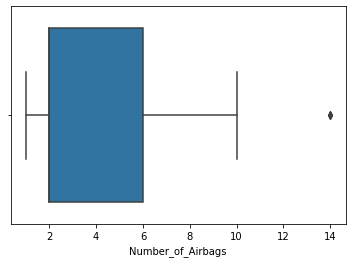

In [119]:
sns.boxplot(df['Number_of_Airbags'])

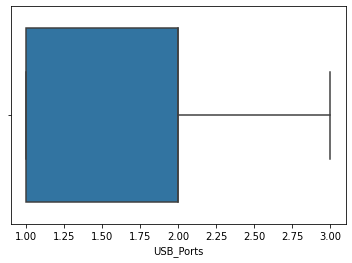

In [120]:
sns.boxplot(df['USB_Ports'])


In [121]:
print(np.where(df['Number_of_Airbags']>10))


(array([1134, 1135, 1136]),)


In [122]:
outlier=(np.where(df['Number_of_Airbags']>10))

print (outlier)

(array([1134, 1135, 1136]),)


In [123]:
cols=['Start_/_Stop_Button','12v_Power_Outlet','Average_Fuel_Consumption', 'Bluetooth','CD_/_MP3_/_DVD_Player', 'Central_Locking','Child_Safety_Locks','Distance_to_Empty', 'Engine_Malfunction_Light', 'FM_Radio', 
'Low_Fuel_Warning', 'Minimum_Turning_Radius', 'Multifunction_Display','Auto-Dimming_Rear-View_Mirror','Hill_Assist',	'Gear_Indicator','Ambient_Lightning', 'Cargo/Boot_Lights', 'Engine_Immobilizer', 'High_Speed_Alert_System', 'Lane_Watch_Camera/_Side_Mirror_Camera',	'Passenger_Side_Seat-Belt_Reminder',	'Seat_Back_Pockets','Voice_Recognition',
'ABS_(Anti-lock_Braking_System)',	'Headlight_Reminder', 'Door_Ajar_Warning','EBD_(Electronic_Brake-force_Distribution)',	'Fasten_Seat_Belt_Warning',	'Gear_Shift_Reminder',
'Key_Off_Reminder',	'USB_Compatibility','Android_Auto',	'Apple_CarPlay',	'Cigarette_Lighter', 'EBA_(Electronic_Brake_Assist)', 'Navigation_System','Second_Row_AC_Vents','Tyre_Pressure_Monitoring_System',
'iPod_Compatibility', 'ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger','ISOFIX_(Child-Seat_Mount)','Rain_Sensing_Wipers','Paddle_Shifters',
'ASR_/_Traction_Control','Cruise_Control']


In [124]:
df[cols] = df[cols].replace([np.nan], 'No')

In [125]:
df.isnull().sum()

Make                                            0
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                    0
Cylinders                                       0
Valves_Per_Cylinder                             0
Drivetrain                                      6
Cylinder_Configuration                          9
Emission_Norm                                  10
Engine_Location                                40
Fuel_System                                     7
Fuel_Tank_Capacity                             59
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           0
City_Mileage                                  521


In [126]:

df=df.drop(['Electric_Range','Engine_Type','Recommended_Tyre_Pressure', 'Heated_Seats', 'Infotainment_Screen',
'Multifunction_Steering_Wheel','Parking_Assistance','Adjustable_Steering_Column', 'Drive_Modes',
'3_Point_Seat-Belt_in_Middle_Rear_Seat','Third_Row_AC_Vents','Power_Seats', 'Front_Track','Rear_Track','ARAI_Certified_Mileage_for_CNG','Kerb_Weight'], axis=1)

In [127]:
df.isnull().sum()

Make                                            0
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                    0
Cylinders                                       0
Valves_Per_Cylinder                             0
Drivetrain                                      6
Cylinder_Configuration                          9
Emission_Norm                                  10
Engine_Location                                40
Fuel_System                                     7
Fuel_Tank_Capacity                             59
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           0
City_Mileage                                  521


In [128]:
df=df.dropna(axis=0, how='any', subset= ['Drivetrain', 'Cylinder_Configuration', 'Emission_Norm', 'Engine_Location', 'Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Length', 'Width', 'Body_Type'] )

In [129]:
df=df.dropna(axis=0, how='any', subset=['Ground_Clearance' ,'Front_Brakes','Rear_Brakes','Front_Suspension','Rear_Suspension','Front_Tyre_&_Rim','Rear_Tyre_&_Rim','Power_Steering','Power_Windows'])  

In [130]:
df=df.dropna(axis=0, how='any', subset=['Tachometer','Tripmeter','Wheelbase','Wheels_Size','Audiosystem','Door_Pockets','Seat_Height_Adjustment'])  

In [131]:
df.isnull().sum()

Make                                           0
Model                                          0
Variant                                        0
Ex-Showroom_Price                              0
Displacement                                   0
Cylinders                                      0
Valves_Per_Cylinder                            0
Drivetrain                                     0
Cylinder_Configuration                         0
Emission_Norm                                  0
Engine_Location                                0
Fuel_System                                    0
Fuel_Tank_Capacity                             0
Fuel_Type                                      0
Height                                         0
Length                                         0
Width                                          0
Body_Type                                      0
Doors                                          0
City_Mileage                                 173
Highway_Mileage     

In [132]:
cols=['USB_Ports','City_Mileage','Highway_Mileage','ARAI_Certified_Mileage','Gears','Odometer','Number_of_Airbags','Extended_Warranty','Aux-in_Compatibility','Average_Fuel_Consumption',
   'Basic_Warranty','Bluetooth','Boot-lid_Opener','Boot_Space','CD_/_MP3_/_DVD_Player','Central_Locking','Child_Safety_Locks','Clock']

In [133]:
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [134]:
df.dropna(axis=1, how='all', inplace=True)

In [135]:
df.isnull().sum()

Make                                           0
Model                                          0
Variant                                        0
Ex-Showroom_Price                              0
Displacement                                   0
Cylinders                                      0
Valves_Per_Cylinder                            0
Drivetrain                                     0
Cylinder_Configuration                         0
Emission_Norm                                  0
Engine_Location                                0
Fuel_System                                    0
Fuel_Tank_Capacity                             0
Fuel_Type                                      0
Height                                         0
Length                                         0
Width                                          0
Body_Type                                      0
Doors                                          0
City_Mileage                                   0
Highway_Mileage     

In [136]:
df=df.dropna(axis=0, how='any', subset=['Keyless_Entry','Adjustable_Headrests'])  

In [137]:
cols=['Gross_Vehicle_Weight','Airbags','Sun_Visor','Fuel-lid_Opener','Fuel_Gauge','Handbrake']
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [138]:
df.isnull().sum()

Make                                           0
Model                                          0
Variant                                        0
Ex-Showroom_Price                              0
Displacement                                   0
Cylinders                                      0
Valves_Per_Cylinder                            0
Drivetrain                                     0
Cylinder_Configuration                         0
Emission_Norm                                  0
Engine_Location                                0
Fuel_System                                    0
Fuel_Tank_Capacity                             0
Fuel_Type                                      0
Height                                         0
Length                                         0
Width                                          0
Body_Type                                      0
Doors                                          0
City_Mileage                                   0
Highway_Mileage     

In [139]:
df.shape

(474, 118)

In [140]:
df.head()


Make  Model                     Variant Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain Cylinder_Configuration Emission_Norm    Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors    City_Mileage Highway_Mileage ARAI_Certified_Mileage  Gears Ground_Clearance     Front_Brakes Rear_Brakes                                   Front_Suspension                                    Rear_Suspension Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering Power_Windows Keyless_Entry         Power         Torque Odometer Speedometer Tachometer Tripmeter  Seating_Capacity Seats_Material    Type Wheelbase Wheels_Size Start_/_Stop_Button 12v_Power_Outlet                          Audiosystem Aux-in_Compatibility Average_Fuel_Consumption                              Basic_Warranty Bluetooth        Boot-lid_Opener  Boot_Space CD_/_MP3_/_DVD_Player Central_Locking Child_Safety_Locks    Clock Cup_Holders  \
55           Tata  Tiago                 Revotron Xt      Rs. 5,20,000      1199 cc        3.0                  4.0  FWD (Front Wheel Drive)                In-line          BS 6  Front, Transverse   Injection          35 litres    Petrol  1535 mm  3746 mm  1647 mm  Hatchback    5.0  23.84 km/litre     23 km/litre            23 km/litre    5.0           170 mm  Ventilated Disc        Drum  Independent, Lower Wishbone, Mcpherson Strut w...  Semi-Independent; Twist beam with dual path strut       175/65 R14      175/65 R14  Electric Power   All Windows        Remote  86PS@6000rpm  114NM@3300rpm  Digital      Analog     Analog       2.0               5.0         Fabric  Manual   2400 mm  175/65 R14                  No              Yes          CD Player with USB & Aux-in                  Yes                      Yes  2 Years / 75,000 KM (whichever is earlier)       Yes  With Remote, Internal  242 litres                   Yes             Yes                Yes  Digital       Front   
56           Tata  Tiago                 Revotron Xz      Rs. 5,70,000      1199 cc        3.0                  4.0  FWD (Front Wheel Drive)                In-line          BS 6  Front, Transverse   Injection          35 litres    Petrol  1535 mm  3746 mm  1647 mm  Hatchback    5.0  23.84 km/litre     23 km/litre            23 km/litre    5.0           170 mm  Ventilated Disc        Drum  Independent, Lower Wishbone, Mcpherson Strut w...  Semi-Independent; Twist beam with dual path strut       175/65 R14      175/65 R14  Electric Power   All Windows        Remote  86PS@6000rpm  114NM@3300rpm  Digital      Analog     Analog       2.0               5.0         Fabric  Manual   2400 mm  175/65 R14                  No              Yes          CD Player with USB & Aux-in                  Yes                      Yes  2 Years / 75,000 KM (whichever is earlier)       Yes  With Remote, Internal  242 litres                   Yes             Yes                Yes  Digital       Front   
57           Tata  Tiago            Revotron Xz Plus      Rs. 5,99,000      1199 cc        3.0                  4.0  FWD (Front Wheel Drive)                In-line          BS 6  Front, Transverse   Injection          35 litres    Petrol  1535 mm  3746 mm  1647 mm  Hatchback    5.0  23.84 km/litre     23 km/litre            23 km/litre    5.0           170 mm  Ventilated Disc        Drum  Independent, Lower Wishbone, Mcpherson Strut w...  Semi-Independent; Twist beam with dual path strut       175/65 R14      175/65 R14  Electric Power   All Windows        Remote  86PS@6000rpm  114NM@3300rpm  Digital      Analog     Analog       2.0               5.0         Fabric  Manual   2400 mm  175/65 R14                  No              Yes          CD Player with USB & Aux-in                  Yes                      Yes  2 Years / 75,000 KM (whichever is earlier)       Yes  With Remote, Internal  242 litres                   Yes             Yes                Yes  Digital       Front   
58           Tata  Tiago  Revotron Xz

In [141]:

df.to_csv('Automobile data-Cleaned.csv', index=False)
files.download('Automobile data-Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Using Cleaned Dataset

In [142]:
from google.colab import files
uploaded = files.upload()

Saving Automobile data-Cleaned.xlsx to Automobile data-Cleaned (2).xlsx


In [143]:
df=pd.read_excel('Automobile data-Cleaned.xlsx')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Columns: 113 entries, Make to USB_Ports
dtypes: float64(16), object(97)
memory usage: 418.6+ KB


In [145]:
convert_dict = {'Ex-Showroom_Price (in Rupees)': int
               }
  
df = df.astype(convert_dict)

In [146]:
df.describe()

Ex-Showroom_Price (in Rupees)  Displacement(in cc)   Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity(in Litres)  Height(in mm)  Length(in mm)  Width(in mm)       Doors       Gears  Seating_Capacity  Wheelbase(in mm)  Boot_Space(in)  Gross_Vehicle_Weight(in Kg)  Number_of_Airbags   USB_Ports
count                   4.740000e+02           474.000000  474.000000           474.000000                     474.000000     474.000000     474.000000    474.000000  474.000000  474.000000        474.000000        474.000000      474.000000                   474.000000         474.000000  474.000000
mean                    3.104891e+06          1777.772152    4.227848             3.888186                      52.715190    1571.436709    4363.236287   1798.694093    4.546414    5.905063          5.244726       2637.510549      407.120253                  2093.546414           3.801688    1.014768
std                     5.795125e+06           789.743239    1.186065             0.579921                      14.032321     131.435260     375.829764    114.786470    0.642864    1.084903          0.957459        169.469577      169.227071                   502.235185           2.344242    0.165123
min                     5.200000e+05           998.000000    3.000000             2.000000                      32.000000    1165.000000    3700.000000   1570.000000    2.000000    4.000000          2.000000       2385.000000       70.000000                  1075.000000           2.000000    1.000000
25%                     8.764022e+05          1353.000000    4.000000             4.000000                      42.000000    1484.250000    3995.000000   1706.000000    4.000000    5.000000          5.000000       2520.000000      285.000000                  1650.000000           2.000000    1.000000
50%                     1.212315e+06          1498.000000    4.000000             4.000000                      50.000000    1530.000000    4413.000000   1765.000000    5.000000    6.000000          5.000000       2600.000000      420.000000                  2315.000000           2.000000    1.000000
75%                     2.701025e+06          1984.000000    4.000000             4.000000                      60.000000    1645.000000    4629.750000   1860.000000    5.000000    7.000000          5.000000       2700.000000      476.000000                  2510.000000           6.000000    1.000000
max                     4.074293e+07          6592.000000   12.000000            12.000000                      93.500000    1922.000000    5299.000000   2207.000000    5.000000    9.000000          8.000000       3210.000000     1400.000000                  3350.000000          10.000000    3.000000

In [147]:
df.corr()

Ex-Showroom_Price (in Rupees)  Displacement(in cc)  Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity(in Litres)  Height(in mm)  Length(in mm)  Width(in mm)     Doors     Gears  Seating_Capacity  Wheelbase(in mm)  Boot_Space(in)  Gross_Vehicle_Weight(in Kg)  Number_of_Airbags  USB_Ports
Ex-Showroom_Price (in Rupees)                       1.000000             0.854803   0.899356             0.064551                       0.649398      -0.281316       0.434913      0.561326 -0.454927  0.495910         -0.392693          0.458879       -0.016467                     0.304816           0.368119   0.156127
Displacement(in cc)                                 0.854803             1.000000   0.847138             0.067068                       0.794254       0.007143       0.623709      0.637851 -0.301610  0.476881         -0.086744          0.616426        0.091079                     0.422066           0.469686   0.121943
Cylinders                                           0.899356             0.847138   1.000000             0.012528                       0.607229      -0.294606       0.422472      0.475091 -0.424266  0.453886         -0.376865          0.435639        0.010923                     0.235503           0.335643   0.133913
Valves_Per_Cylinder                                 0.064551             0.067068   0.012528             1.000000                       0.034269      -0.020383       0.079575      0.065736 -0.056936  0.060379          0.015118          0.072131        0.024696                     0.018495           0.120506   0.017281
Fuel_Tank_Capacity(in Litres)                       0.649398             0.794254   0.607229             0.034269                       1.000000       0.202418       0.761239      0.740279 -0.157547  0.564614          0.087733          0.767062        0.157180                     0.464618           0.569284   0.095800
Height(in mm)                                      -0.281316             0.007143  -0.294606            -0.020383                       0.202418       1.000000       0.135201      0.241592  0.720232 -0.032964          0.832895          0.204521        0.012161                     0.408988           0.055140  -0.064104
Length(in mm)                                       0.434913             0.623709   0.422472             0.079575                       0.761239       0.135201       1.000000      0.698992 -0.266102  0.591975          0.175498          0.911558        0.414203                     0.363347           0.638476   0.179956
Width(in mm)                                        0.561326             0.637851   0.475091             0.065736                       0.740279       0.241592       0.698992      1.000000 -0.025464  0.644666          0.062009          0.808242        0.157072                     0.500879           0.588052   0.248644
Doors                                              -0.454927            -0.301610  -0.424266            -0.056936                      -0.157547       0.720232      -0.266102     -0.025464  1.000000 -0.152812          0.596334         -0.092666       -0.119907                     0.220594          -0.103303  -0.076178
Gears                                               0.495910             0.476881   0.453886             0.060379                       0.564614      -0.032964       0.591975      0.644666 -0.152812  1.000000         -0.101739          0.655759        0.166966                     0.364039           0.588607   0.173065
Seating_Capacity                                   -0.392693            -0.086744  -0.376865             0.015118                       0.087733       0.832895       0.175498      0.062009  0.596334 -0.101739          1.000000          0.164416       -0.045407                     0.251674           0.053694  -0.103143
Wheelbase(in mm)                                    0.458879             0.616426   0.435639             0.072131                       0.767062       0.204521       0.911558      0.808242 -0

#Visualizing Data

##Univariate Analysis

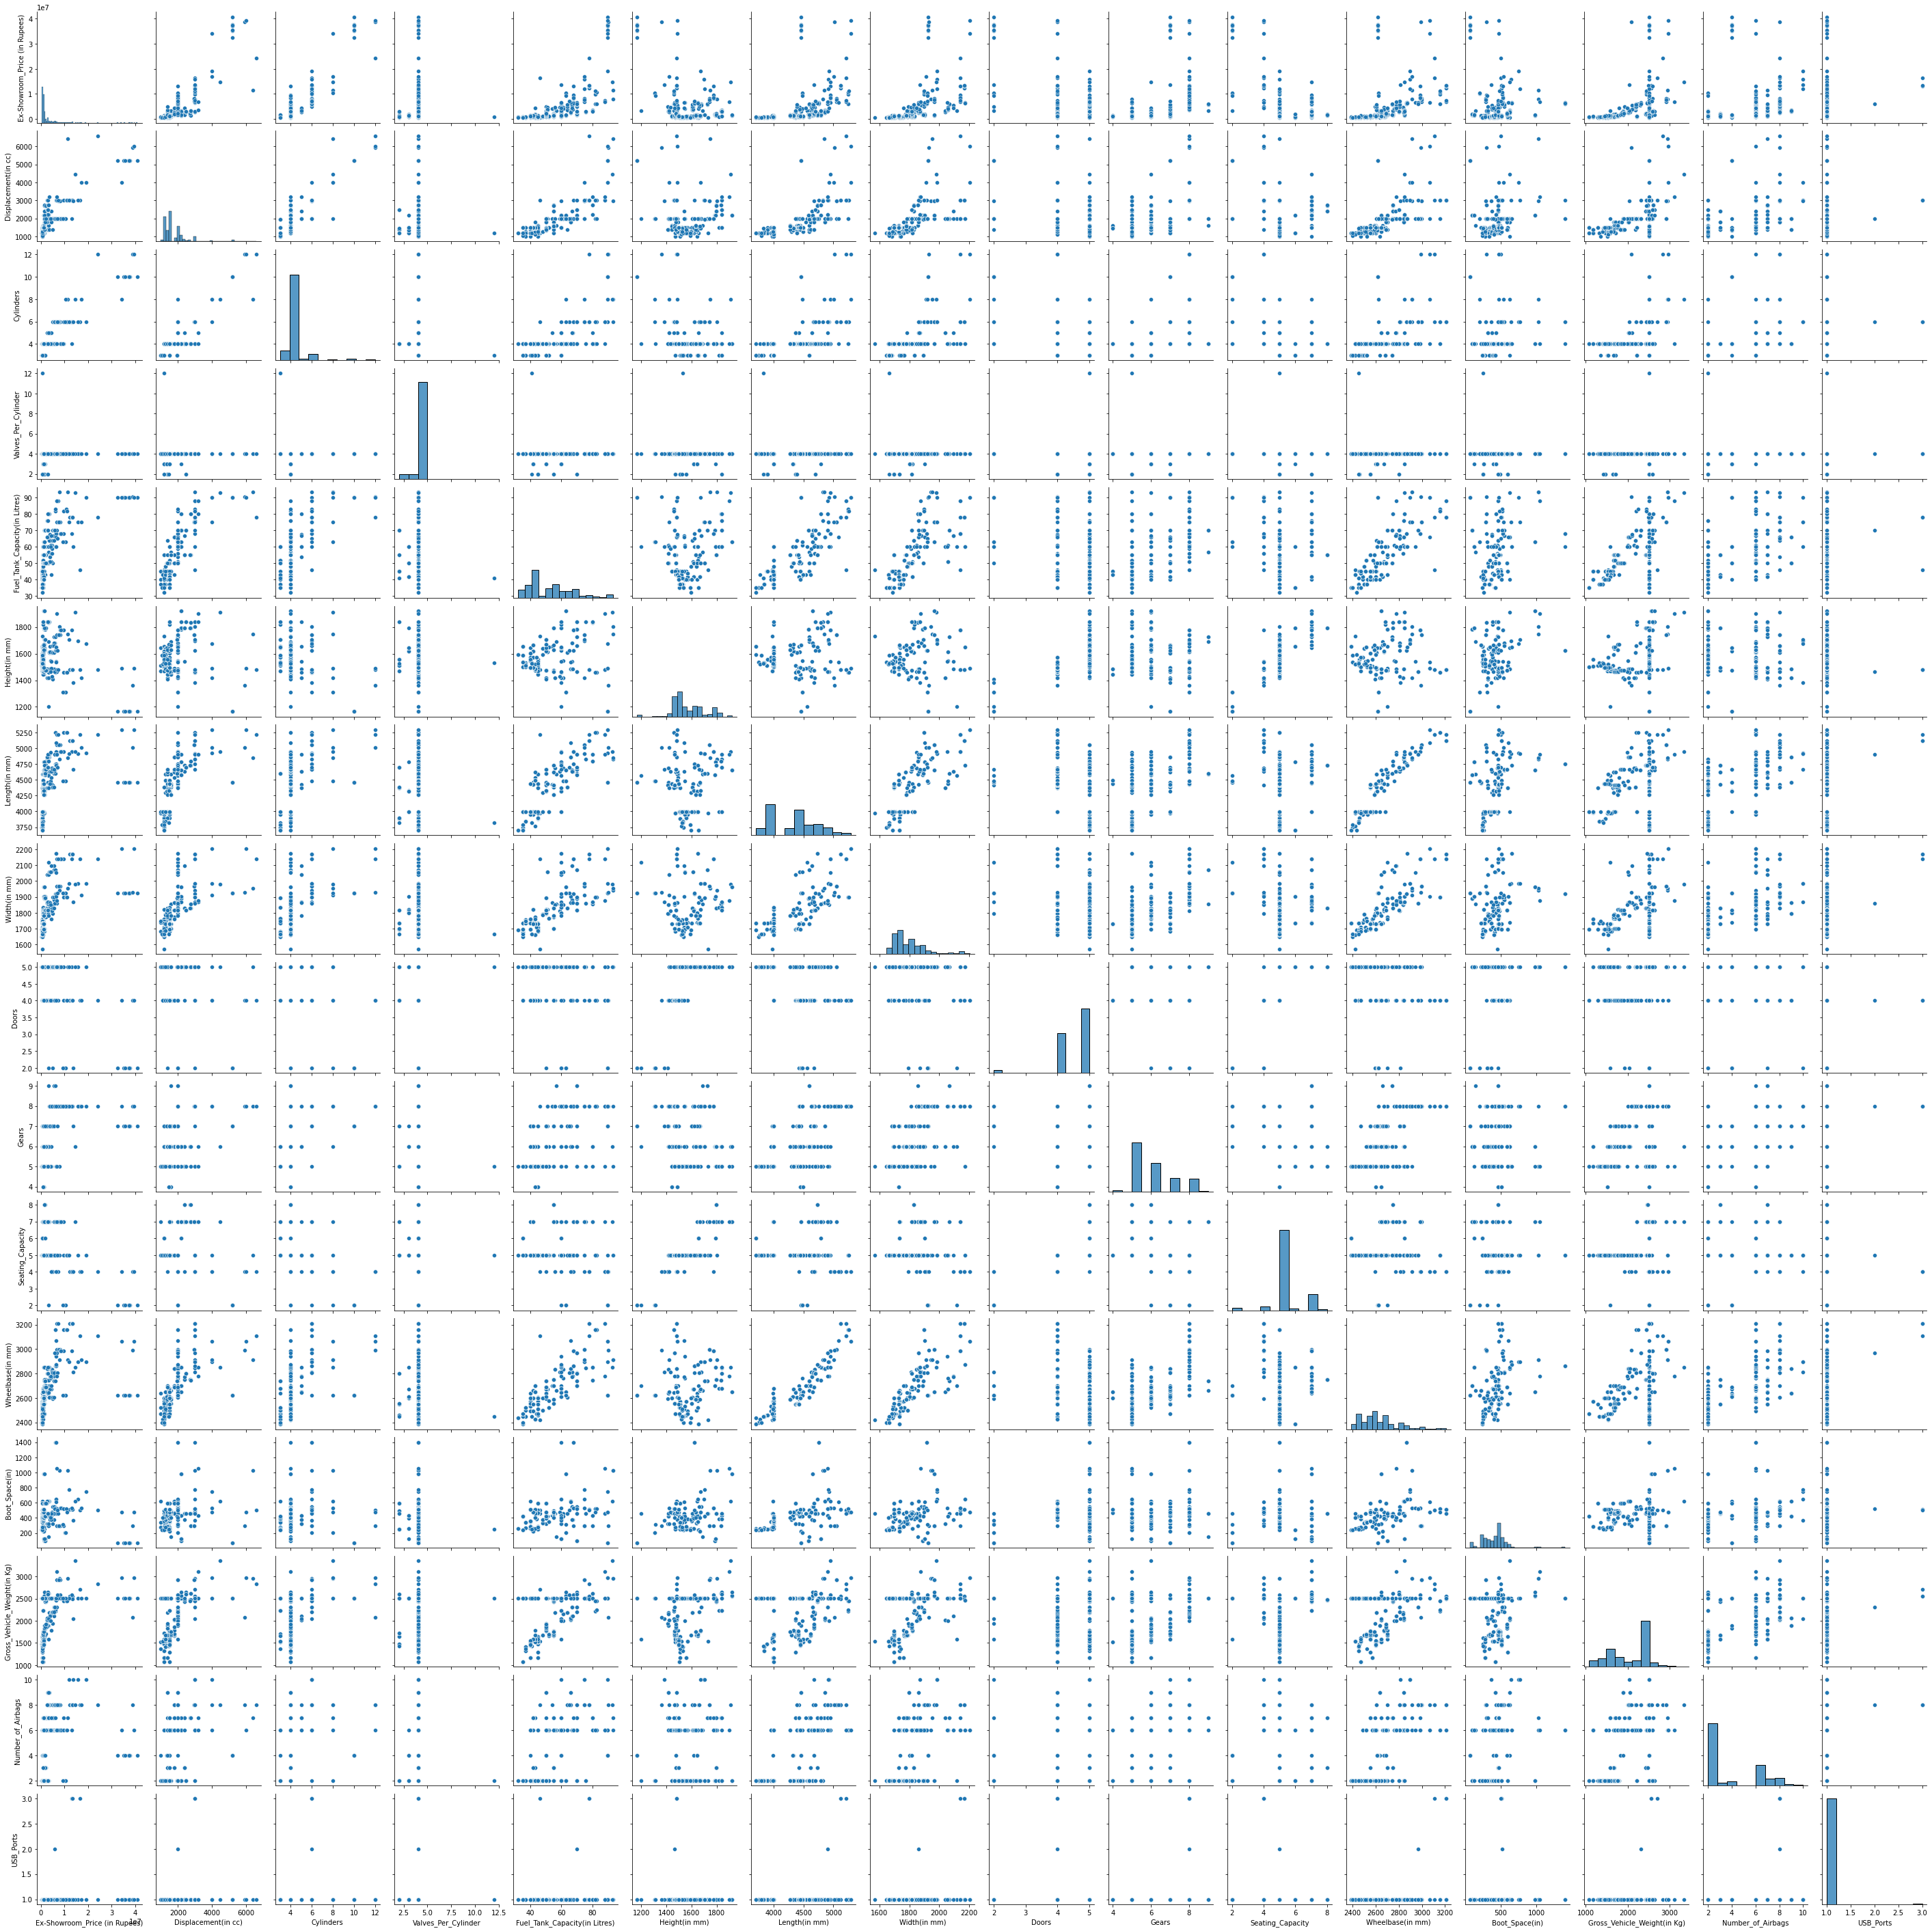

In [148]:
sns.pairplot(df)

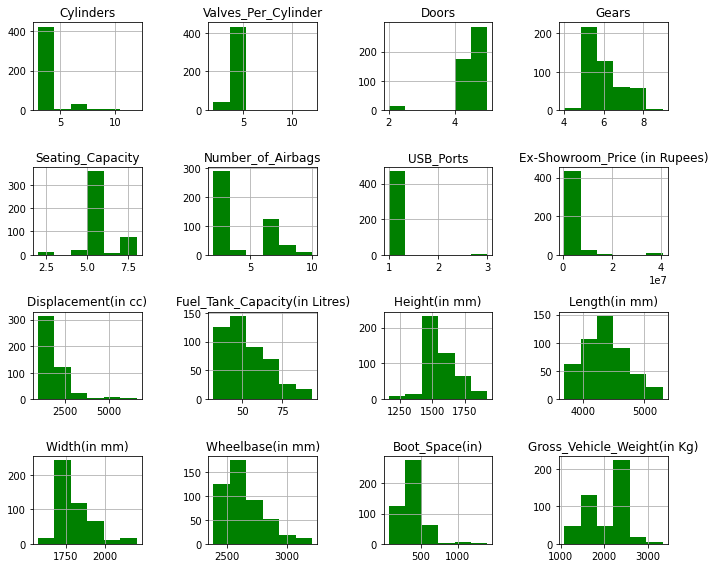

In [149]:
# 1 plt.figure(figsize=(10,8))
df[['Cylinders','Valves_Per_Cylinder','Doors','Gears','Seating_Capacity',	'Number_of_Airbags','USB_Ports','Ex-Showroom_Price (in Rupees)','Displacement(in cc)','Fuel_Tank_Capacity(in Litres)','Height(in mm)','Length(in mm)','Width(in mm)','Wheelbase(in mm)','Boot_Space(in)','Gross_Vehicle_Weight(in Kg)']].hist(figsize=(10,8),bins=6,color='G')
# 2 plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

#Findings:
*   About 94% of the vehicles have 4 gears 
*   The number of valves per cylinder in the cars ranges from >2 to <=6
*   The cars mostly have 4 or 5 doors, 2 being the b=number for the 'coupe' cars
*   Most cars have the number of gears between 5 and 8
*   5 to 6 seaters are the most popular choice
*   All cars have atleast 2 airbags, which is the most common occurence, followed by 6 airbags
*   Only in a few models, have more than 1 USB Ports provided
*   Displacement is less than 3750 cc for most cars

*   Fuel tank capacity for most cars is around 50 Litres
*   List item









In [150]:
df.shape

(474, 113)

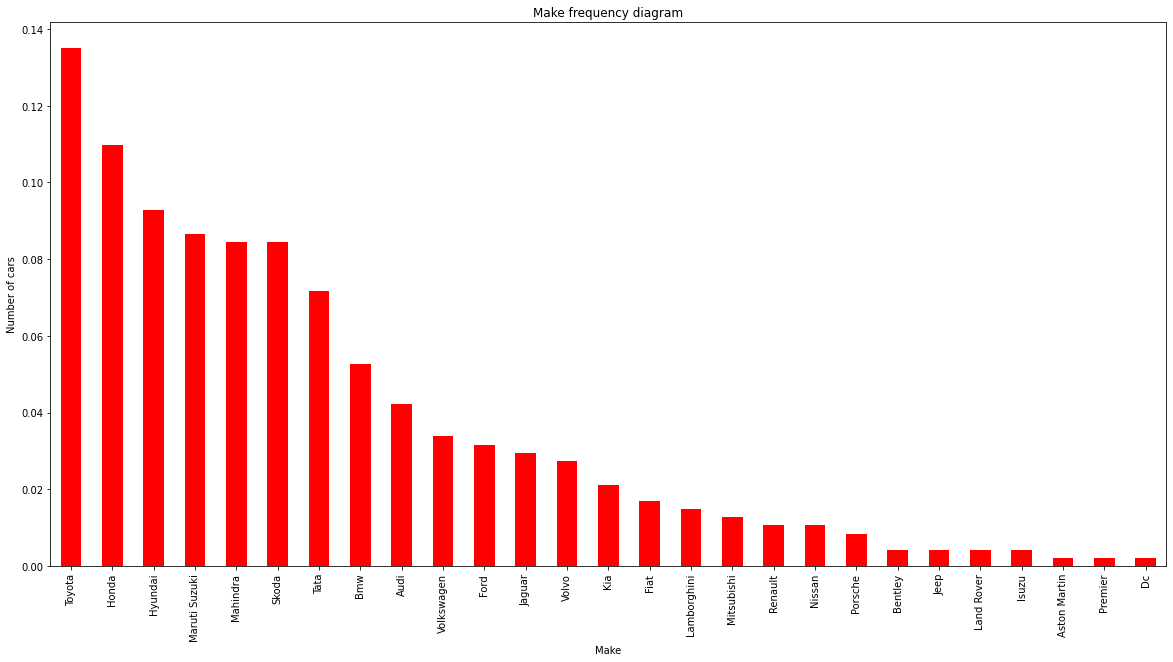

In [151]:
df['Make'].value_counts(normalize=True).plot(figsize=(20,10),kind='bar',color='R')
plt.title("Make frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Make');

Toyota is the most popular model with almost 14% of the sales, follwed by Honda and Hyundai. Mahindra and Skoda make similar sales. DC is the least popular with >1% sales.

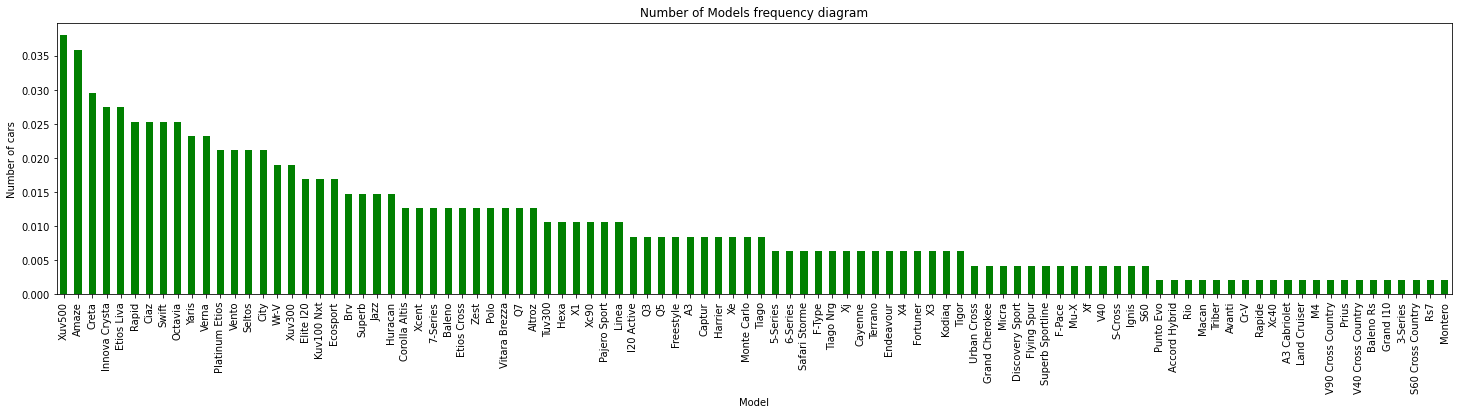

In [152]:
df['Model'].value_counts(normalize=True).plot(figsize=(25,5),kind='bar',color='green')
plt.title("Number of Models frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Model');

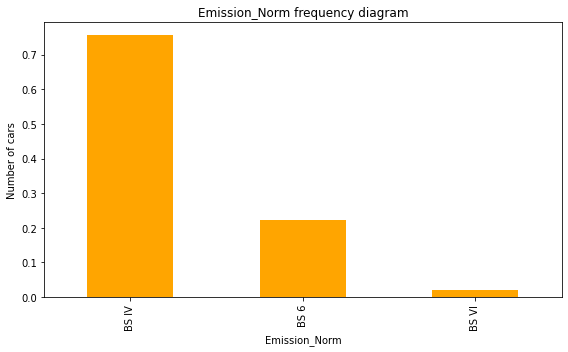

In [153]:
plt.subplot()
df['Emission_Norm'].value_counts(normalize=True).plot(figsize=(8,5),kind='bar',color='orange')
plt.title("Emission_Norm frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Emission_Norm');
plt.tight_layout()
plt.show()

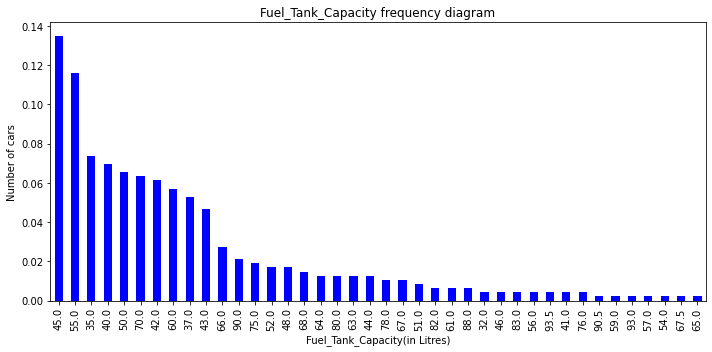

In [154]:
plt.subplot()
df['Fuel_Tank_Capacity(in Litres)'].value_counts(normalize=True).plot(figsize=(10,5),kind='bar',color='B')
plt.title("Fuel_Tank_Capacity frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Fuel_Tank_Capacity(in Litres)');
plt.tight_layout()
plt.show()

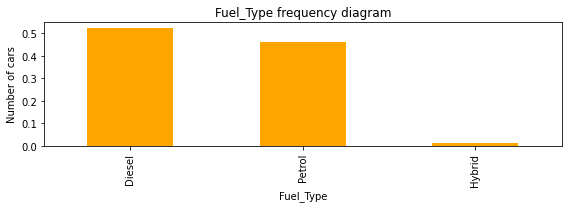

In [155]:
plt.subplot()
df['Fuel_Type'].value_counts(normalize=True).plot(figsize=(8,3),kind='bar',color='orange')
plt.title("Fuel_Type frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Fuel_Type');
plt.tight_layout()
plt.show()

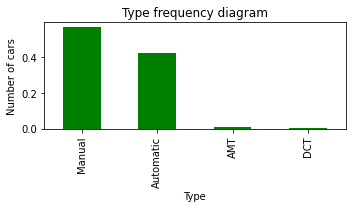

In [156]:
plt.subplot()
df['Type'].value_counts(normalize=True).plot(figsize=(5,3),kind='bar',color='Green')
plt.title("Type frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Type');
plt.tight_layout()
plt.show()

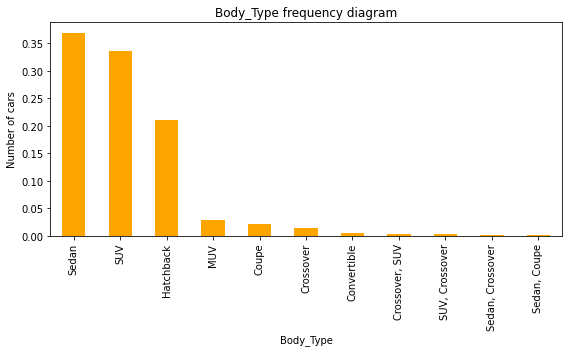

In [157]:
plt.subplot()
df['Body_Type'].value_counts(normalize=True).plot(figsize=(8,5),kind='bar',color='orange')
plt.title("Body_Type frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Body_Type');
plt.tight_layout()
plt.show()

In [158]:
plt.subplot()
df['Ex-Showroom_Price (in Rupees)'].value_counts(normalize=True).plot(figsize=(500,100),kind='bar',color='Pink')
plt.title("Ex-Showroom_Price frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Ex-Showroom_Price (in Rupees)');
plt.tight_layout()
plt.show()

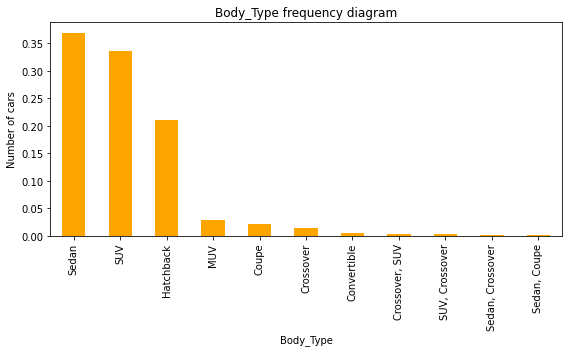

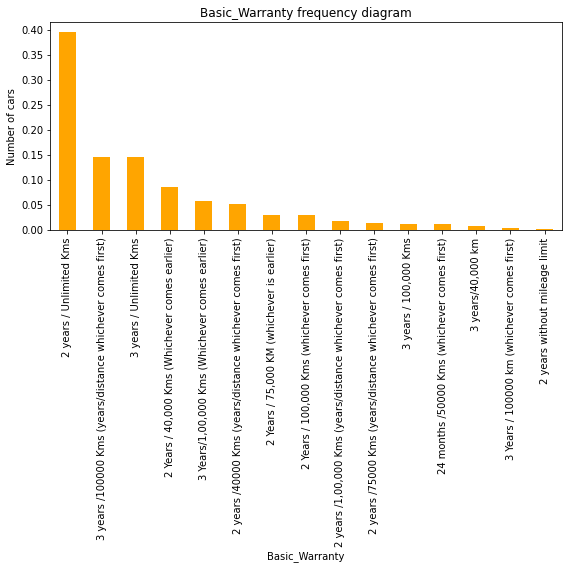

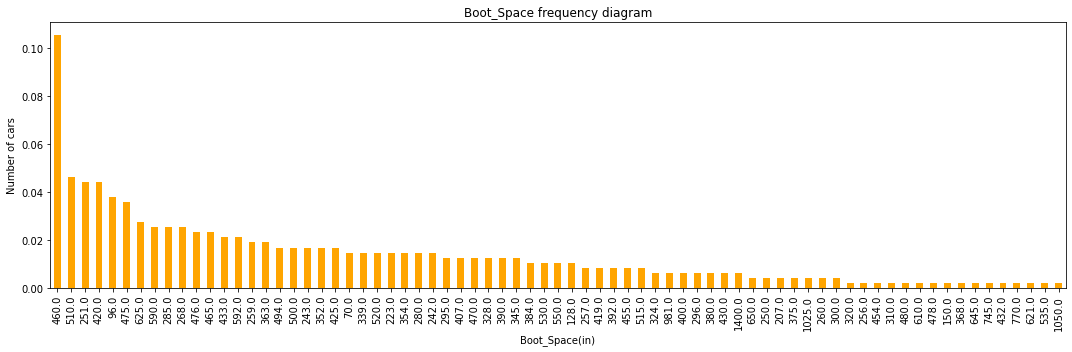

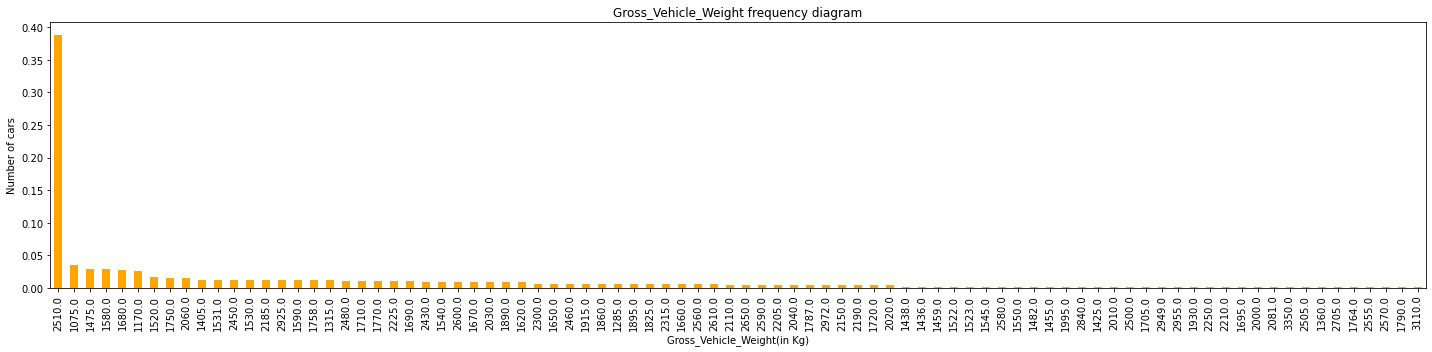

In [159]:


plt.subplot()
df['Body_Type'].value_counts(normalize=True).plot(figsize=(8,5),kind='bar',color='orange')
plt.title("Body_Type frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Body_Type');
plt.tight_layout()
plt.show()

plt.subplot()
df['Basic_Warranty'].value_counts(normalize=True).plot(figsize=(8,8),kind='bar',color='orange')
plt.title("Basic_Warranty frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Basic_Warranty');
plt.tight_layout()
plt.show()

plt.subplot()
df['Boot_Space(in)'].value_counts(normalize=True).plot(figsize=(15,5),kind='bar',color='orange')
plt.title("Boot_Space frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Boot_Space(in)');
plt.tight_layout()
plt.show()

plt.subplot()
df['Gross_Vehicle_Weight(in Kg)'].value_counts(normalize=True).plot(figsize=(20,5),kind='bar',color='orange')
plt.title("Gross_Vehicle_Weight frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Gross_Vehicle_Weight(in Kg)');
plt.tight_layout()
plt.show()



Findings:
*   Xuv500 has the highest share of the sales with more than 3.5 %
*   More than 70% of the cars only follow BS1V Emission norms
*   45 Litres fuel cpacity is most commonly bought with 65 L being the least popular
*   Hybrid cars make up less than 10% of the sales
*   Manual cars remain the most popular choice with more than 40% sales
*   Sedan+SUV sale make up around 70% of the sales
*   About 40% of the cars provide 2 years/Unlimited Kms basic warranty
*   Boot space is highl varied with 10% being the highest share with 460 Litres capacity
*   Most cars (~40%) weigh 2510 Kg

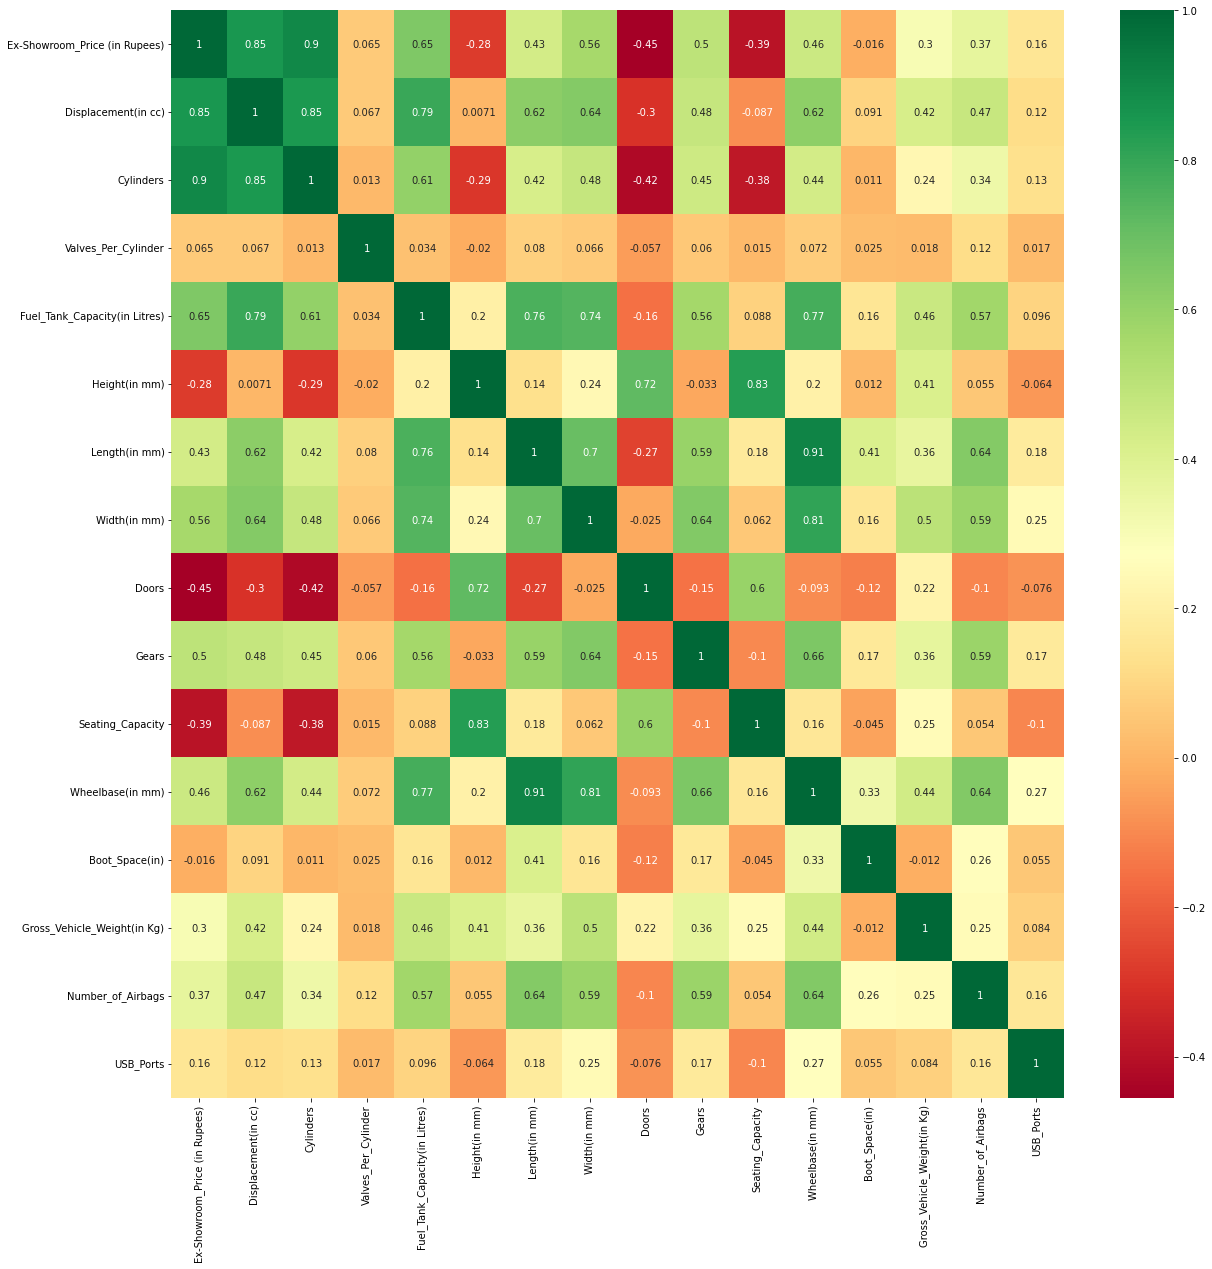

In [160]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Findings:
*   Doors and Seating Capacity, Gears and Number of Airbags are positively correlated
*   Doors and Cylinders, Seating Capacity and Cylinders are negatively correlated.

#Bivariate Analysis

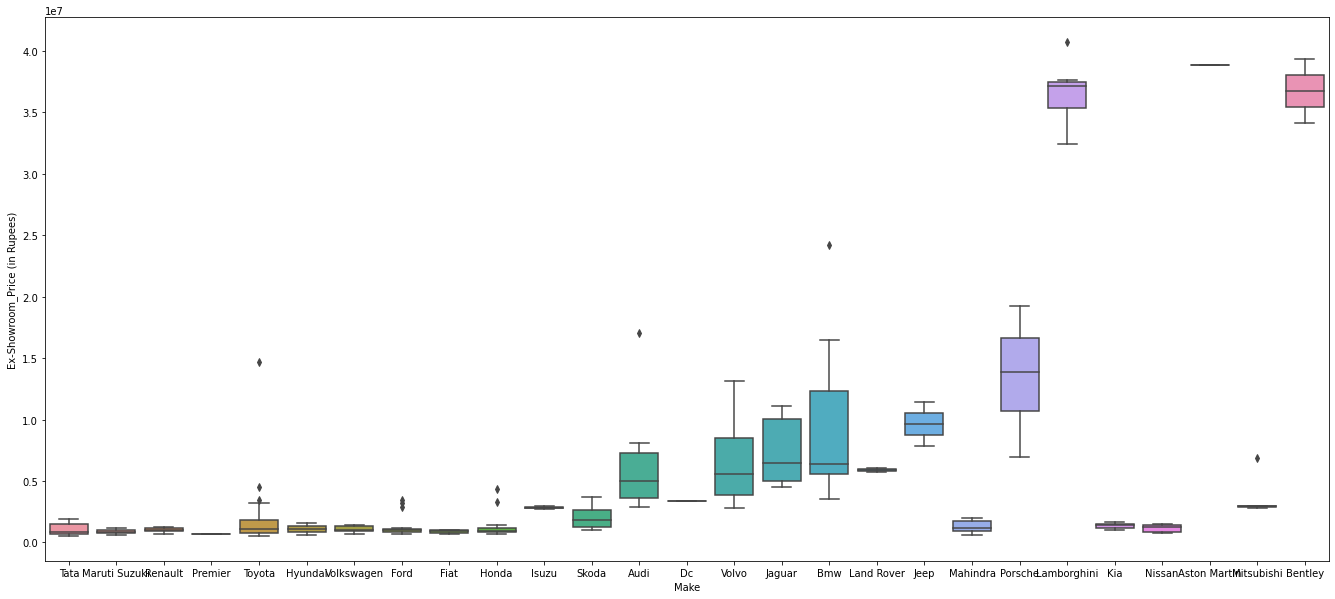

In [161]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Make", y="Ex-Showroom_Price (in Rupees)", data=df)

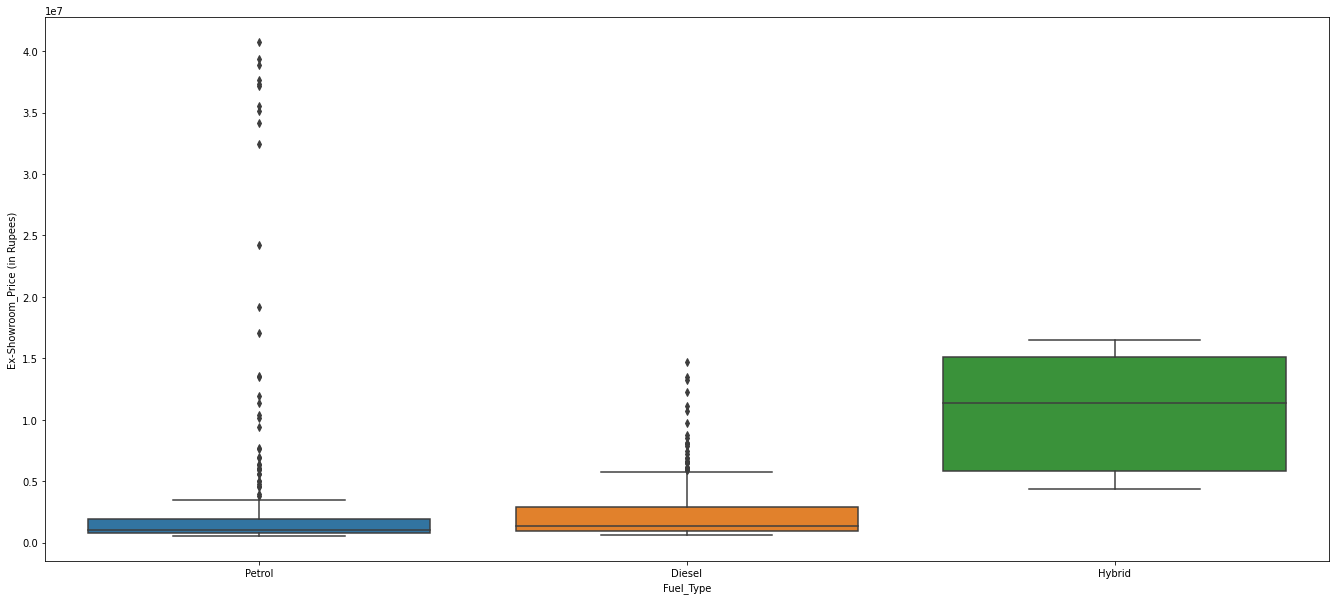

In [162]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Fuel_Type", y="Ex-Showroom_Price (in Rupees)", data=df)

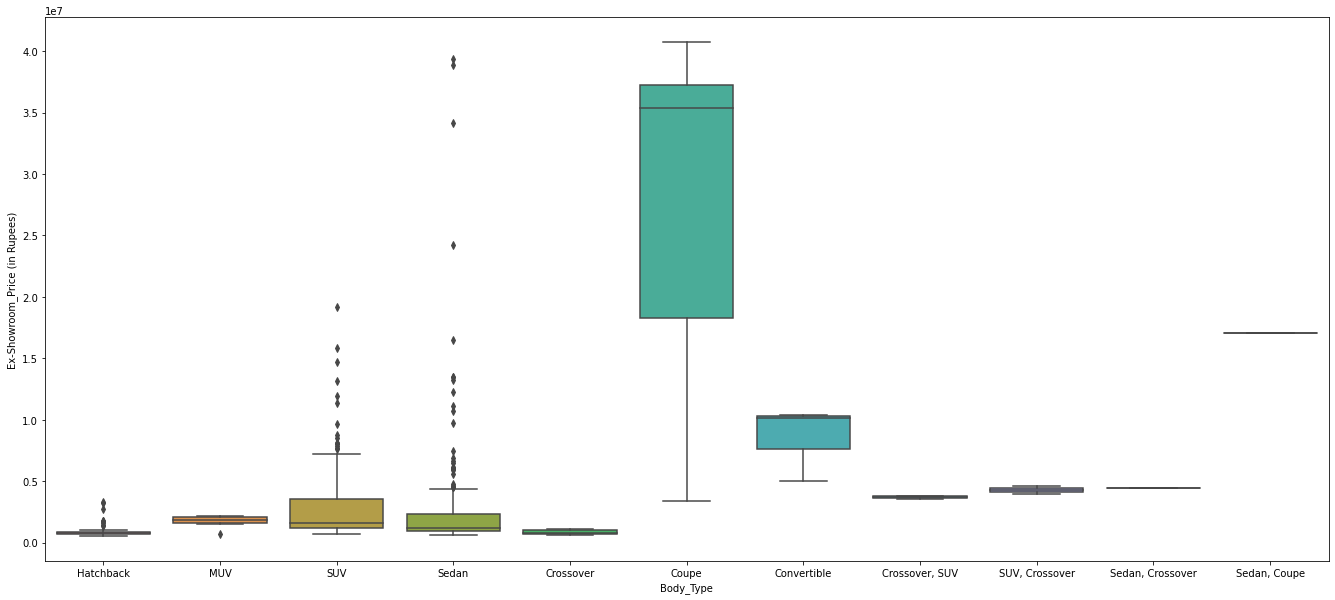

In [163]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Body_Type", y="Ex-Showroom_Price (in Rupees)", data=df)

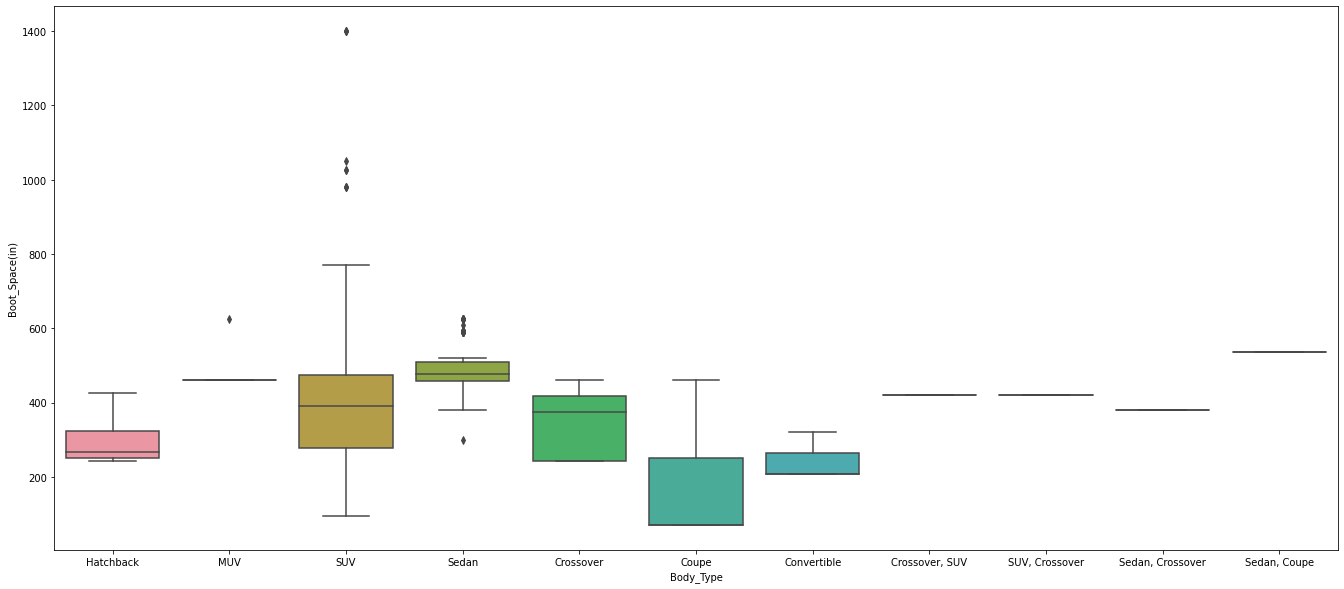

In [164]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Body_Type", y="Boot_Space(in)", data=df)

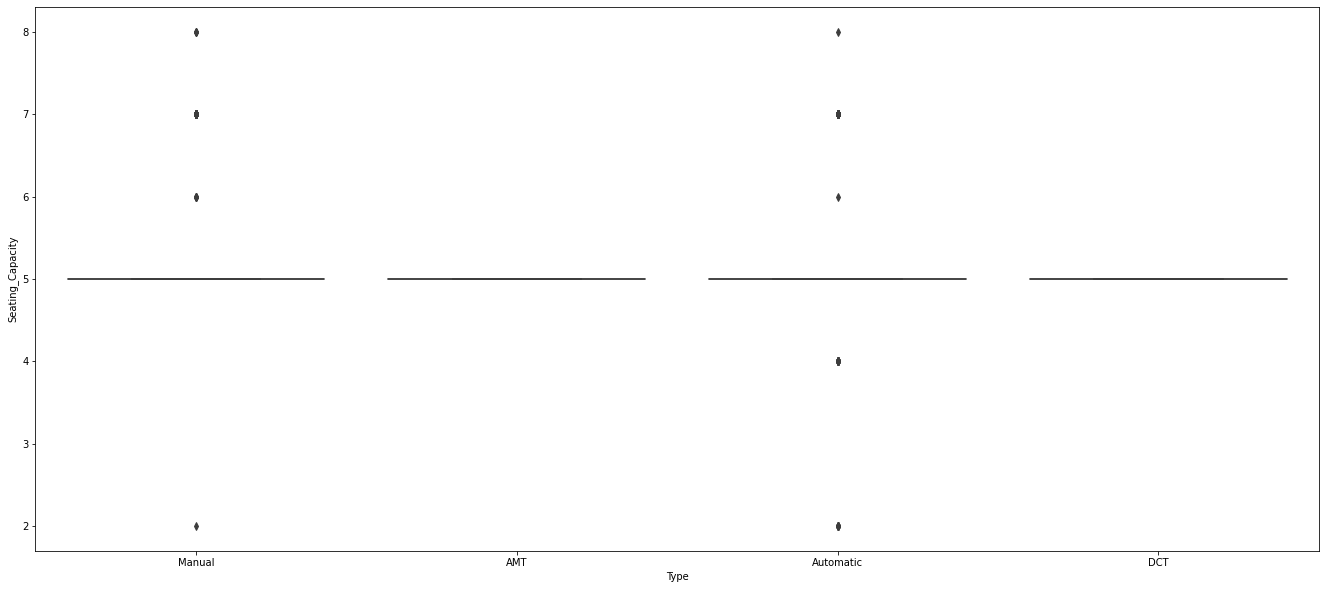

In [165]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Type", y="Seating_Capacity", data=df)

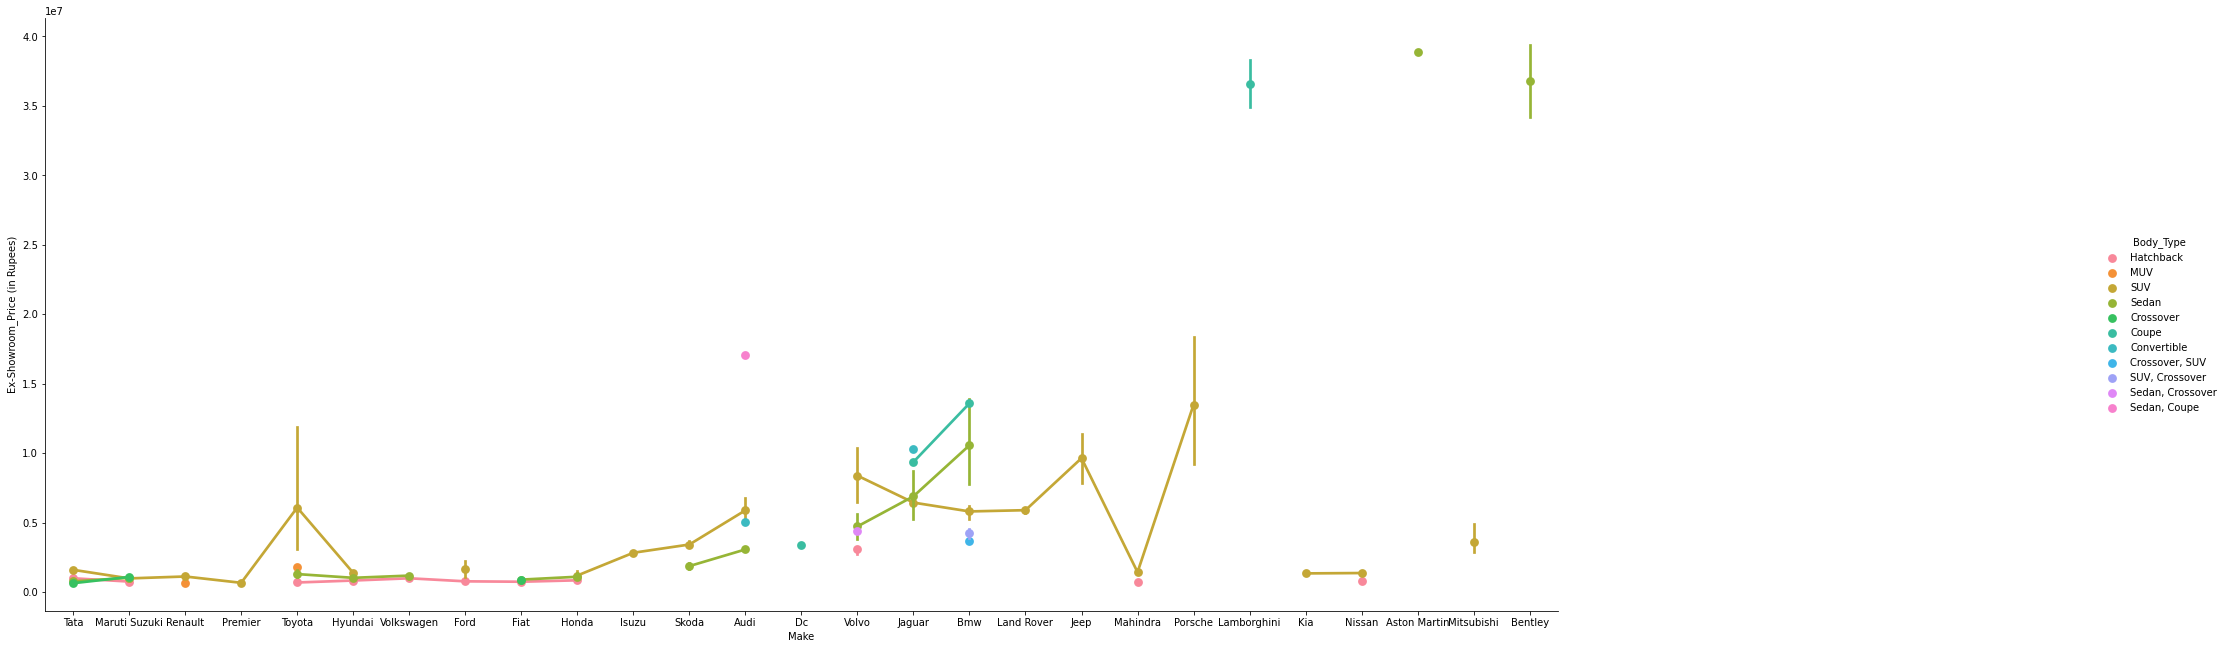

In [166]:

g=sns.catplot(data=df, x="Make", y="Ex-Showroom_Price (in Rupees)", hue="Body_Type" ,kind="point")
g.fig.set_figwidth(35)
g.fig.set_figheight(10)

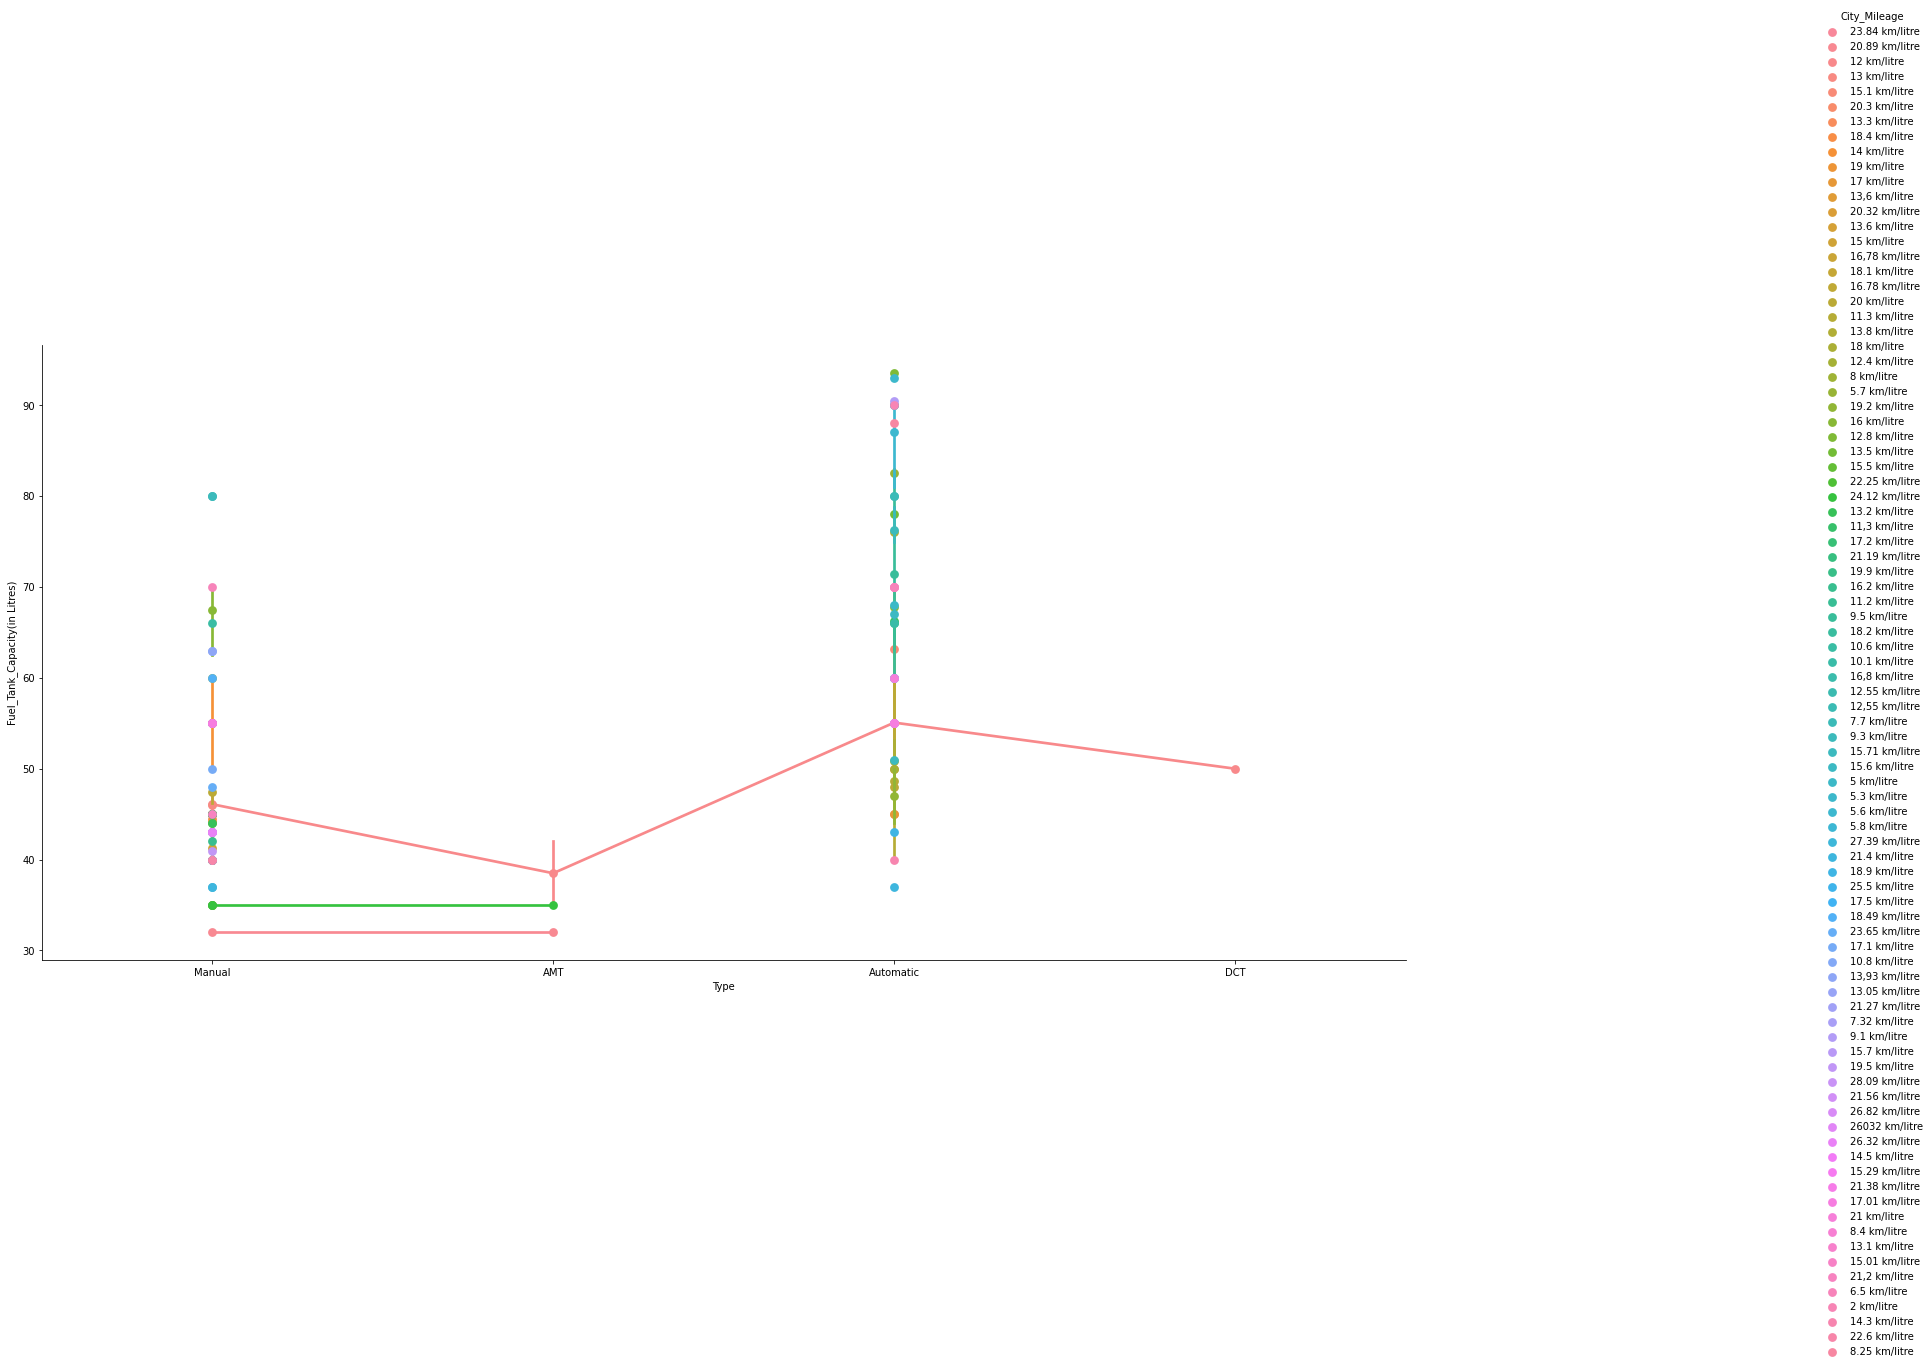

In [167]:
g=sns.catplot(data=df, x="Type", y="Fuel_Tank_Capacity(in Litres)", hue="City_Mileage" ,kind="point")
g.fig.set_figwidth(30)
g.fig.set_figheight(10)

#Findings


* Bentley has the highest price range, followed by Aston Martin and Porsche, but a specific Lamborghini model is the most expensive car at Rs. 4 Crore
* Hybrid remains the most expensive segment, but Petrol cars show a high degree of variance in terms of price, starting frim about Rs. 5.2 Lakhs to Rs. 4 Crore+
* The range for Coupes is the highest and broadest, while Hatchbacks and Crossovers have the lowest prices. Sedans have a widely varying range
* SUVs provide the most Boot space, upto 1400 Litres.
* The seating capacity across the Types of cars is mostly 5 
* Aston Martin sedans are the most expensive cars, folllowed by Bentley sedans and Lamborghini coupes. Tata Hatchbacks are the most afodable starting from Rs 5 Lakh. SUVs vary greatly in prices, depending on the make. Porche Cayenne being the most expensive and Premier Rio the least.
*   Automatic cars have the highest cariation in fuel tank capacity from 35 to 90 Litres. All DCTs have 50L capacity. 

In [88]:
g2=sns.factorplot(data=df, x='Body_Type', y='Gross_Vehicle_Weight(in Kg)', col='Fuel_Type',row='Ventilation_System')
g2.fig.set_figwidth(50)
g2.fig.set_figheight(30)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe9b02088c0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fe9b02113b0> (for post_execute):


KeyboardInterrupt: ignored

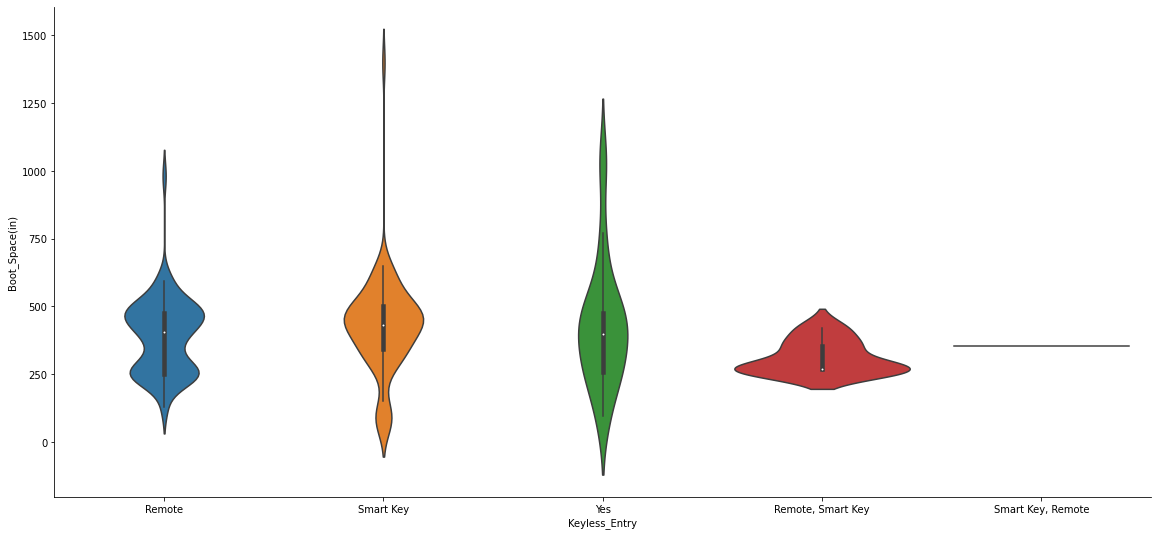

In [168]:
g3=sns.catplot(data=df, x="Keyless_Entry", y="Boot_Space(in)",kind="violin")
g3.fig.set_figwidth(20)
g3.fig.set_figheight(8)

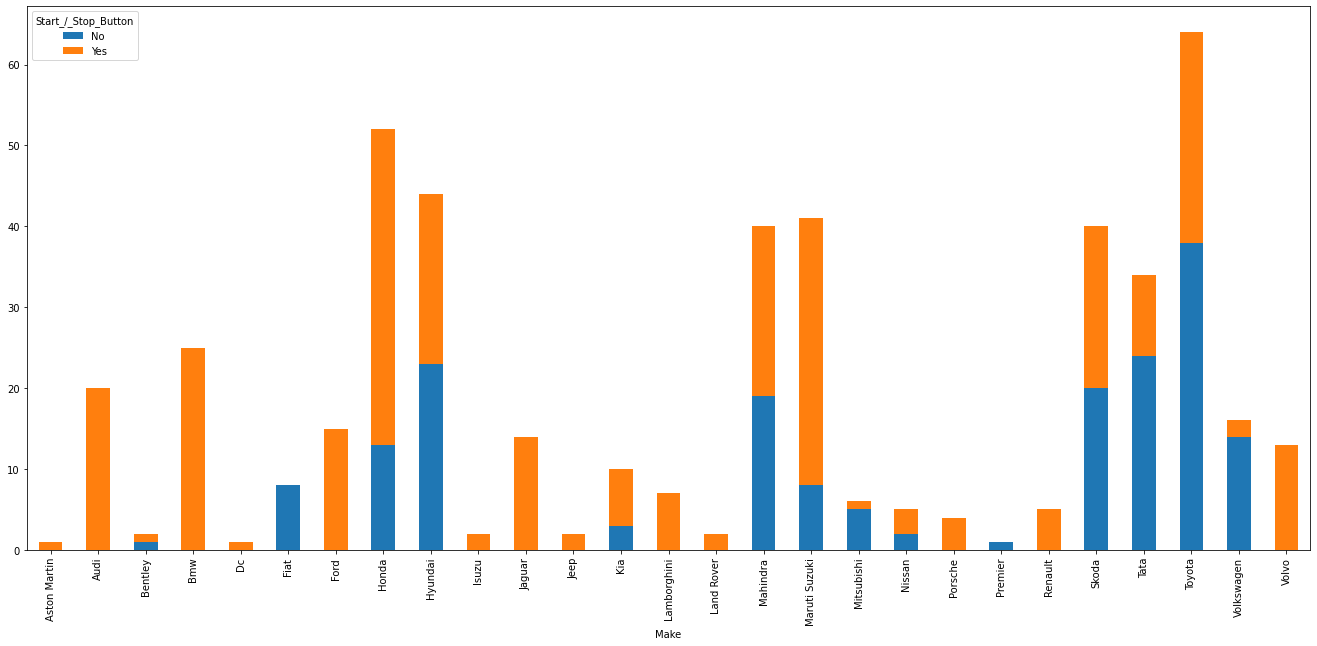

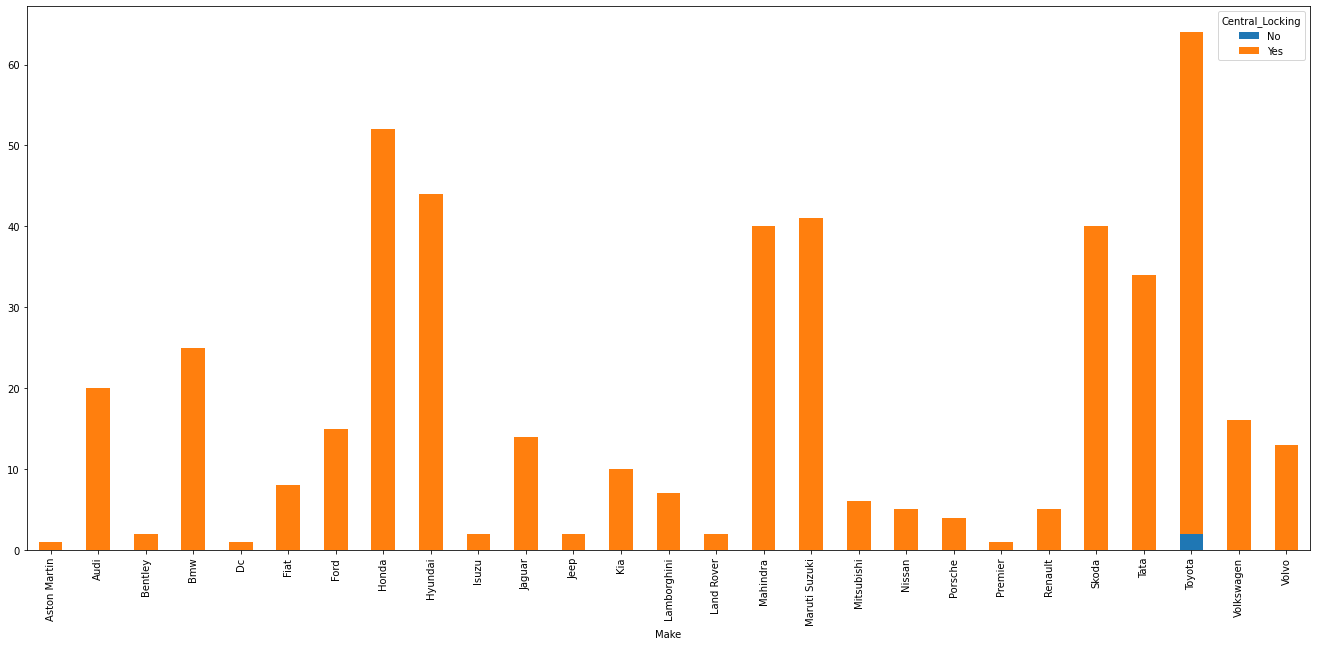

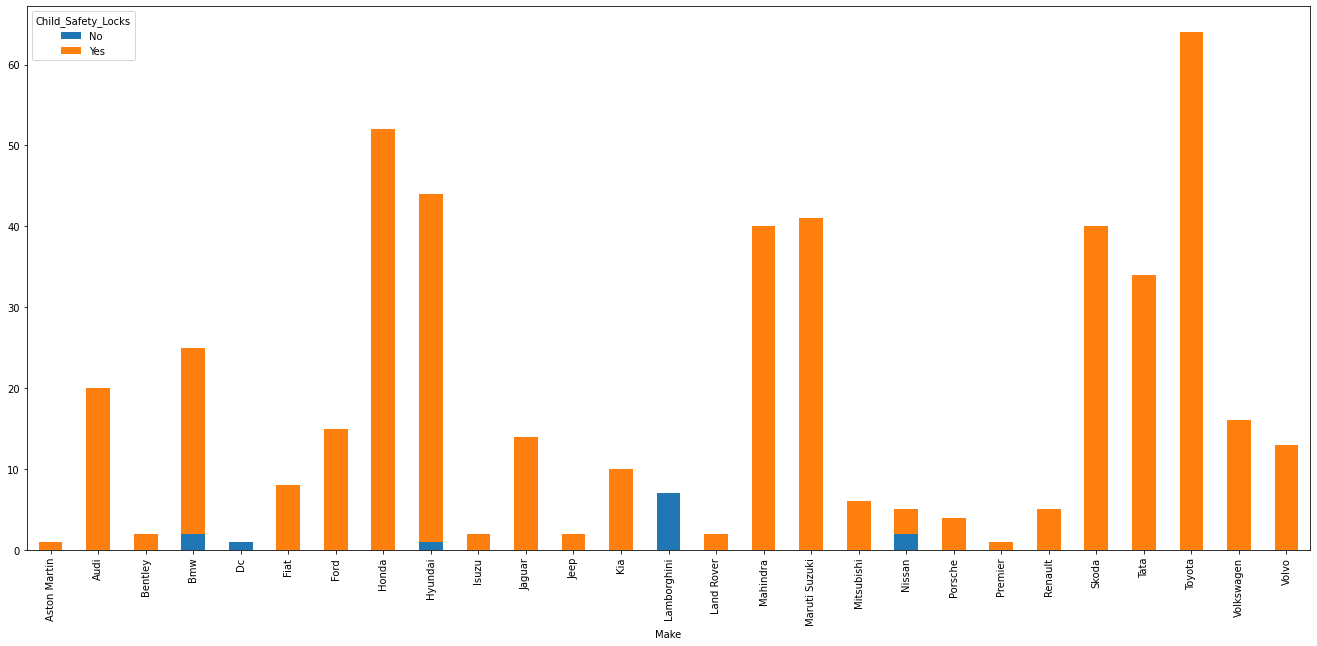

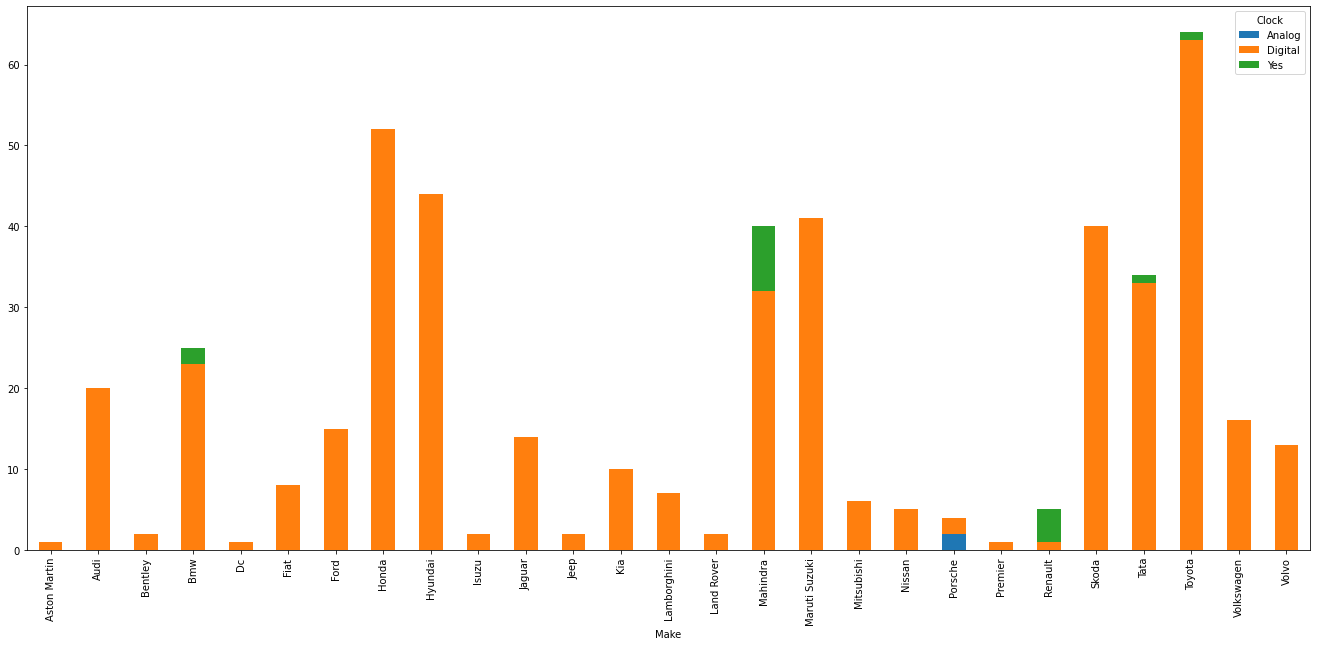

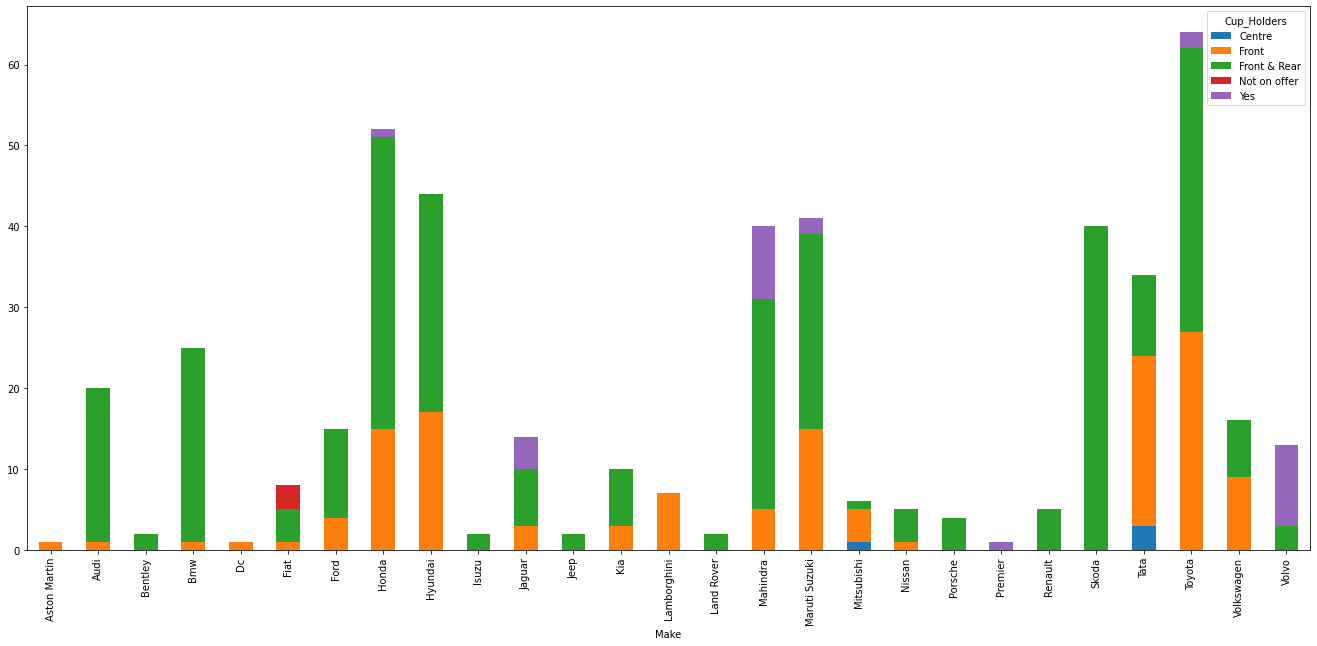

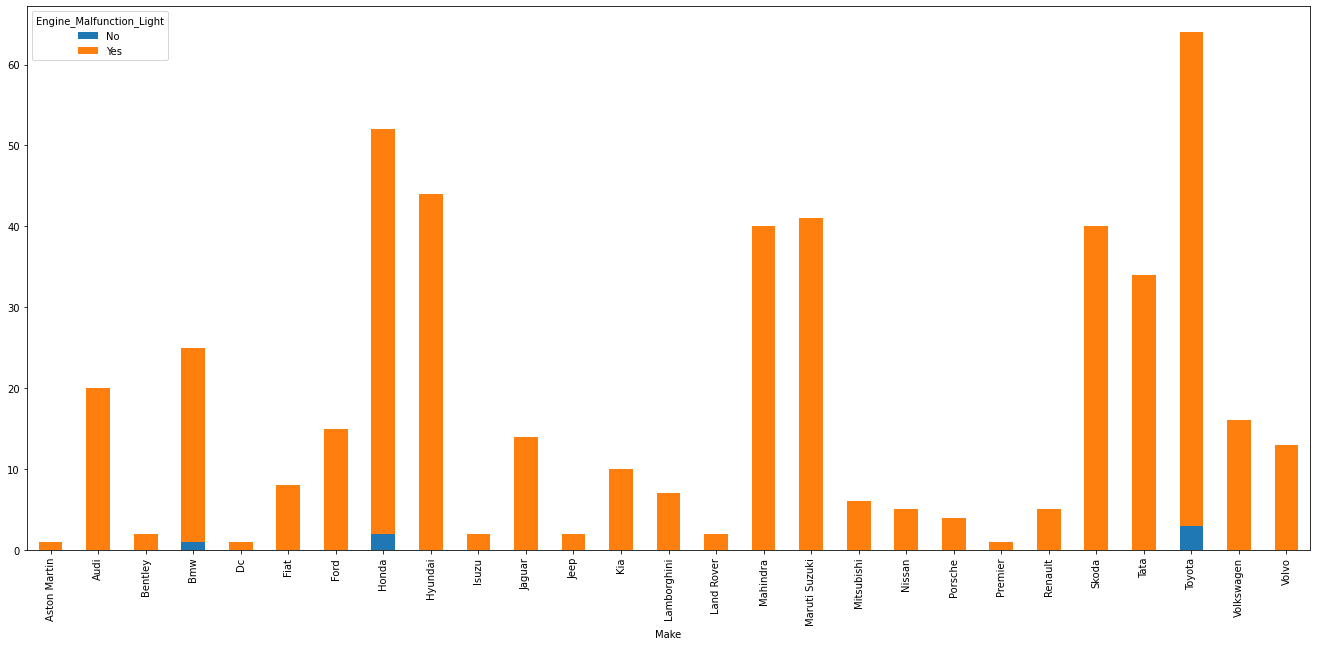

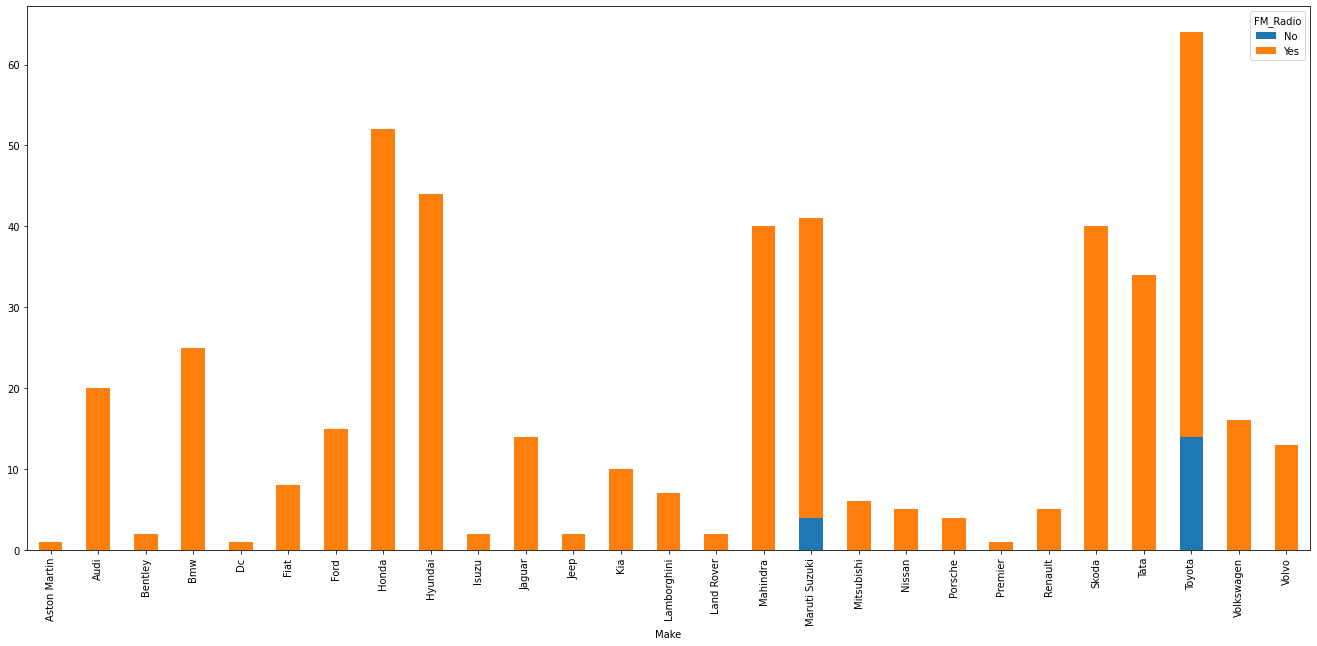

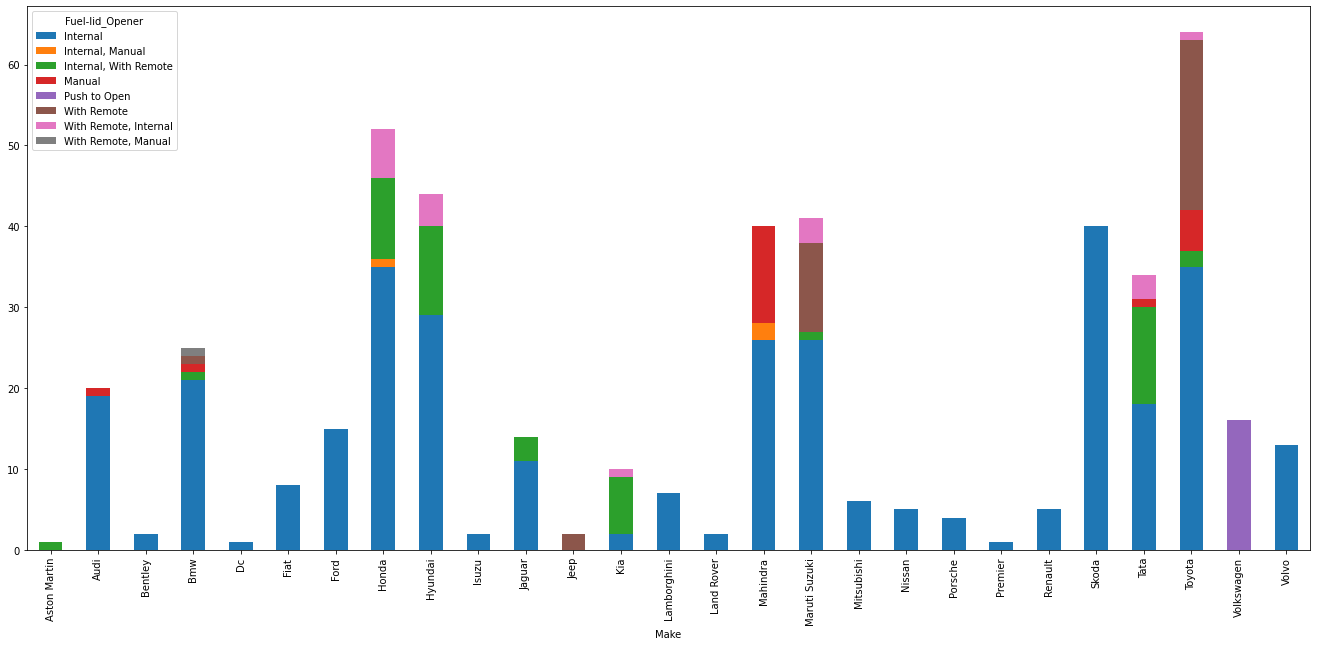

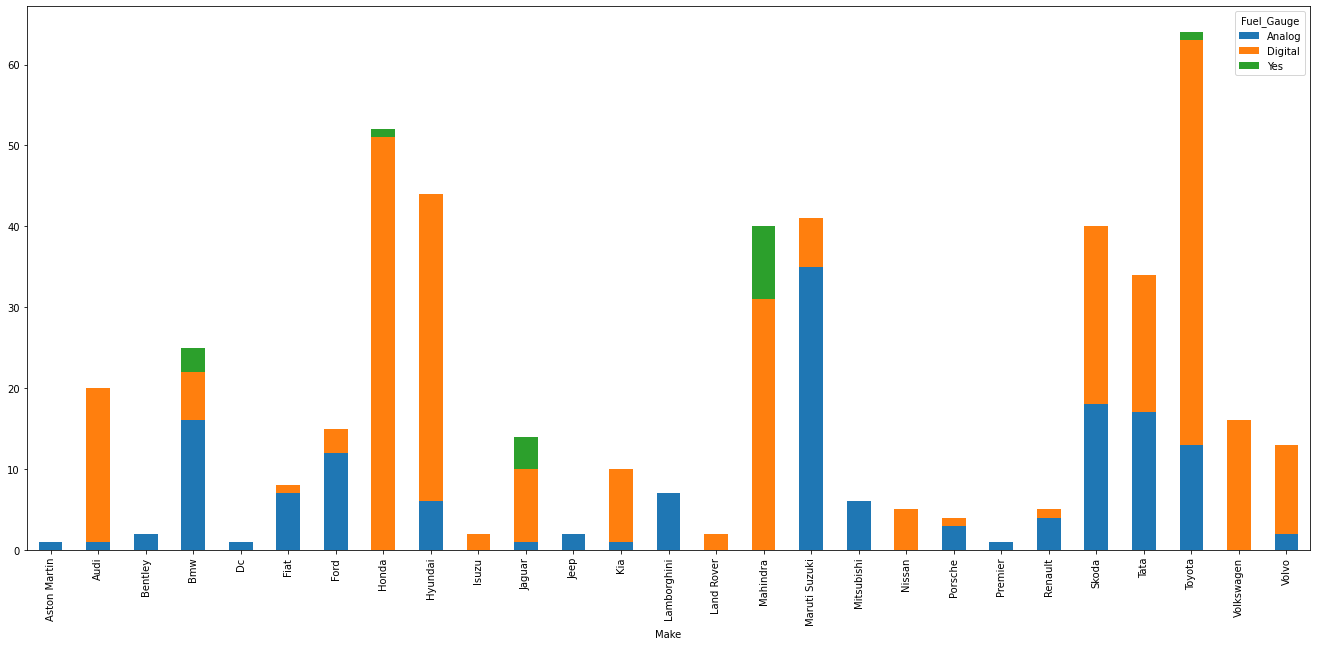

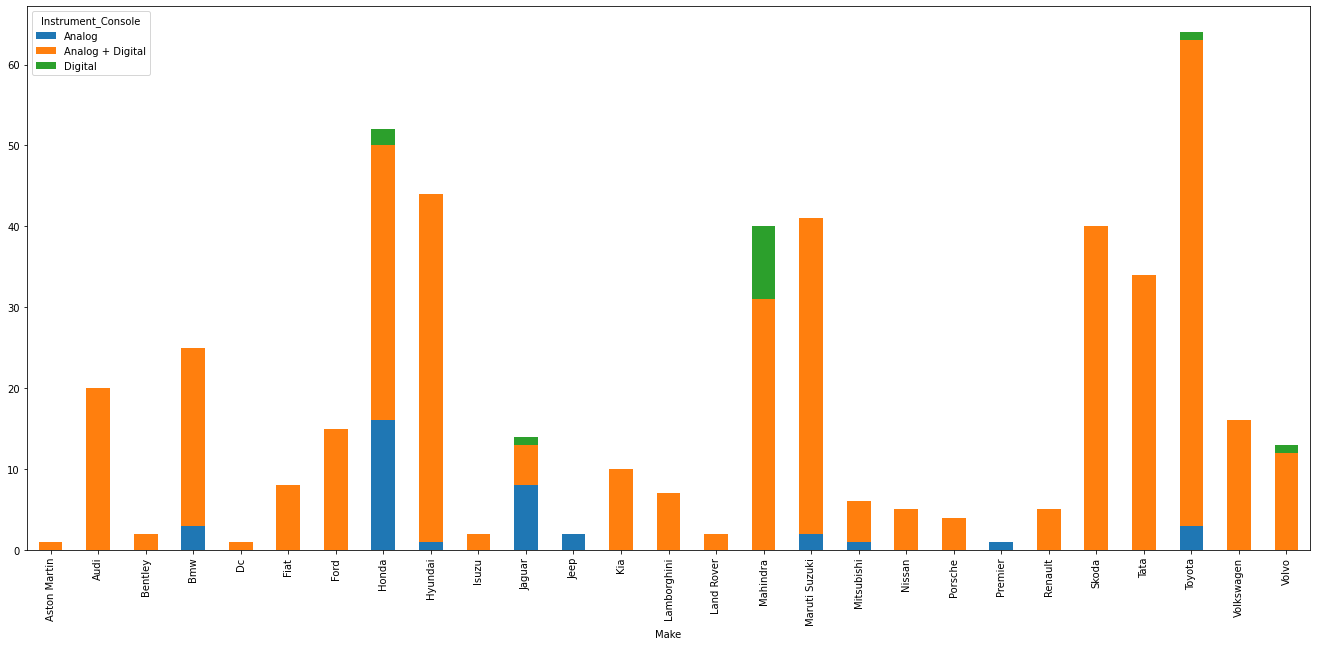

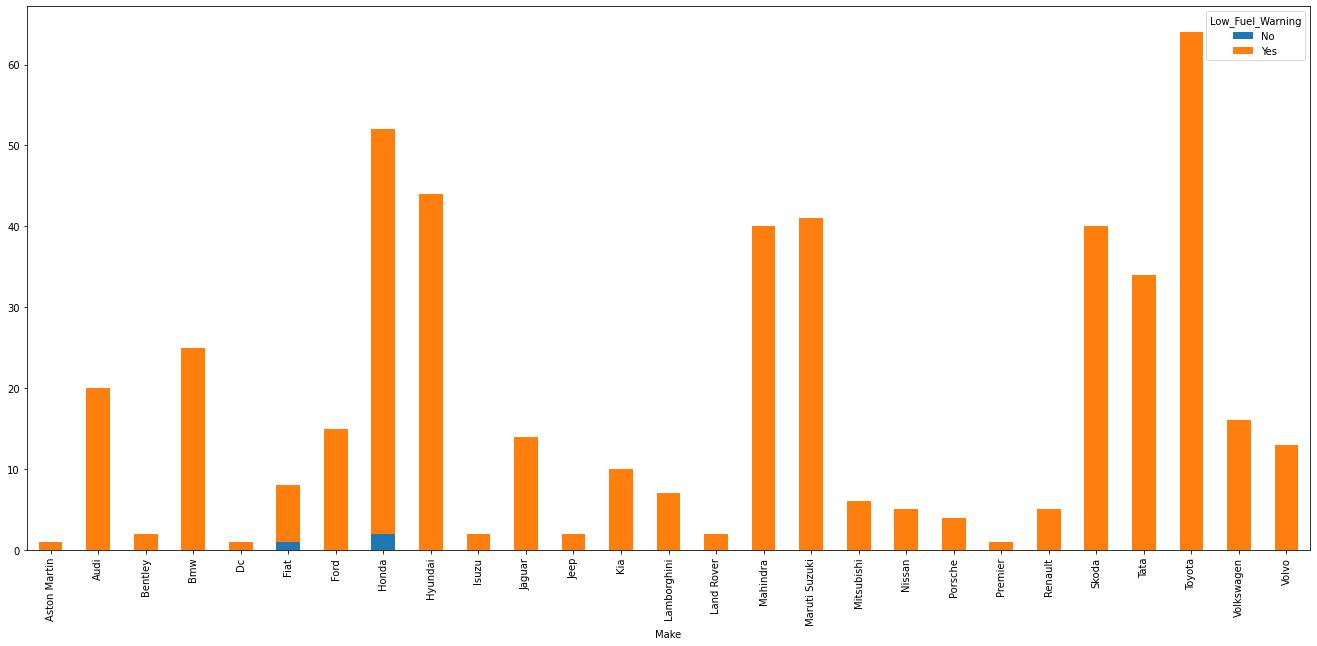

In [169]:
pd.crosstab(df['Make'],df['Start_/_Stop_Button']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Central_Locking']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Child_Safety_Locks']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Clock']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Cup_Holders']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Engine_Malfunction_Light']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['FM_Radio']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Fuel-lid_Opener']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Fuel_Gauge']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Instrument_Console']).plot.bar(stacked=True)
pd.crosstab(df['Make'],df['Low_Fuel_Warning']).plot.bar(stacked=True)



##Findings:
* No Fiat and Premier cars have Start/Stop Button
*  Toyota has >10 models without a Central Locking system
*  No Lamborghini or DC cars have Child safety locks. Nissan, BMW AND Hyundai have less than 10 cars without it
*   Porsche has analog clocks
*   Front and Rear cupholders are seen in most cars with Mitsubishi and Tata offering them in the centre in a few models. Fiat has cars with no cup holders too
*   BMW, Honda and Toyota do not have Engine Malfunction Light for some models
*   All makers have FM Radio inbuilt except some Maruti Suzuki and Toyota cars
*   All Jeeps have a remote-controlled lid-opener system. BMW provides the option of both- Manual+with Remote
*   Mahindra has the most Digital Instrument consoles
*   Except some Fiats and Hondas, all provide Low Fuel warning





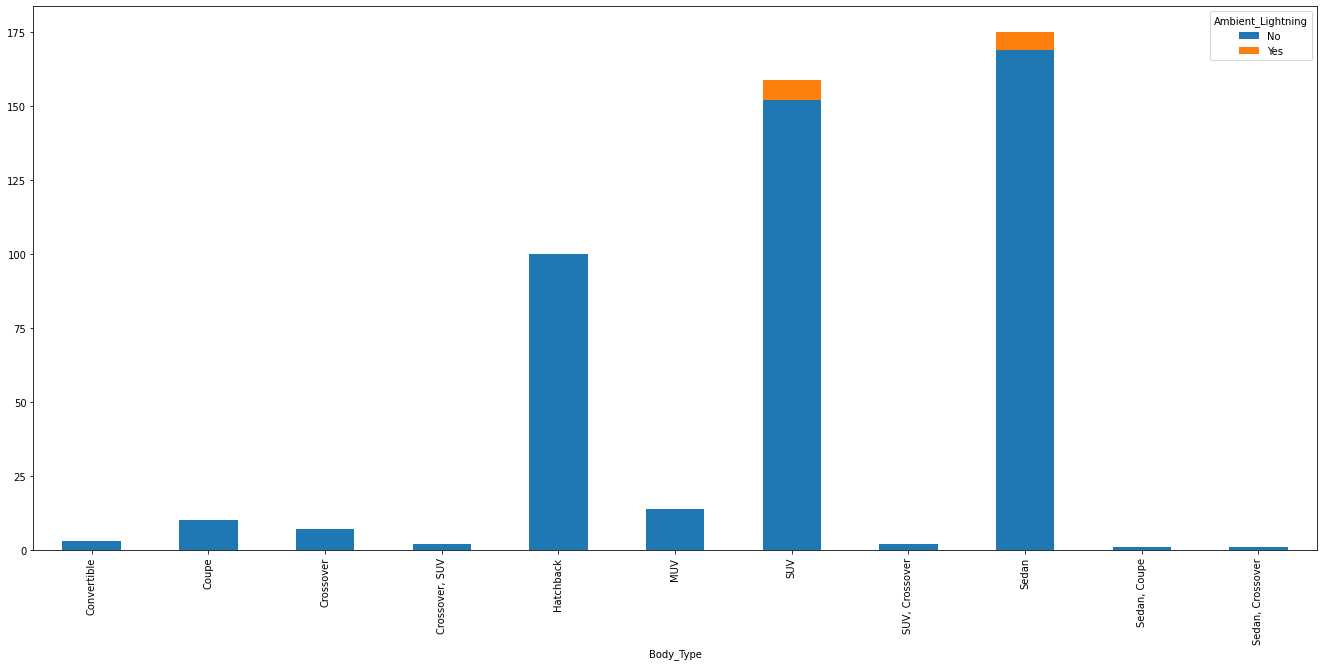

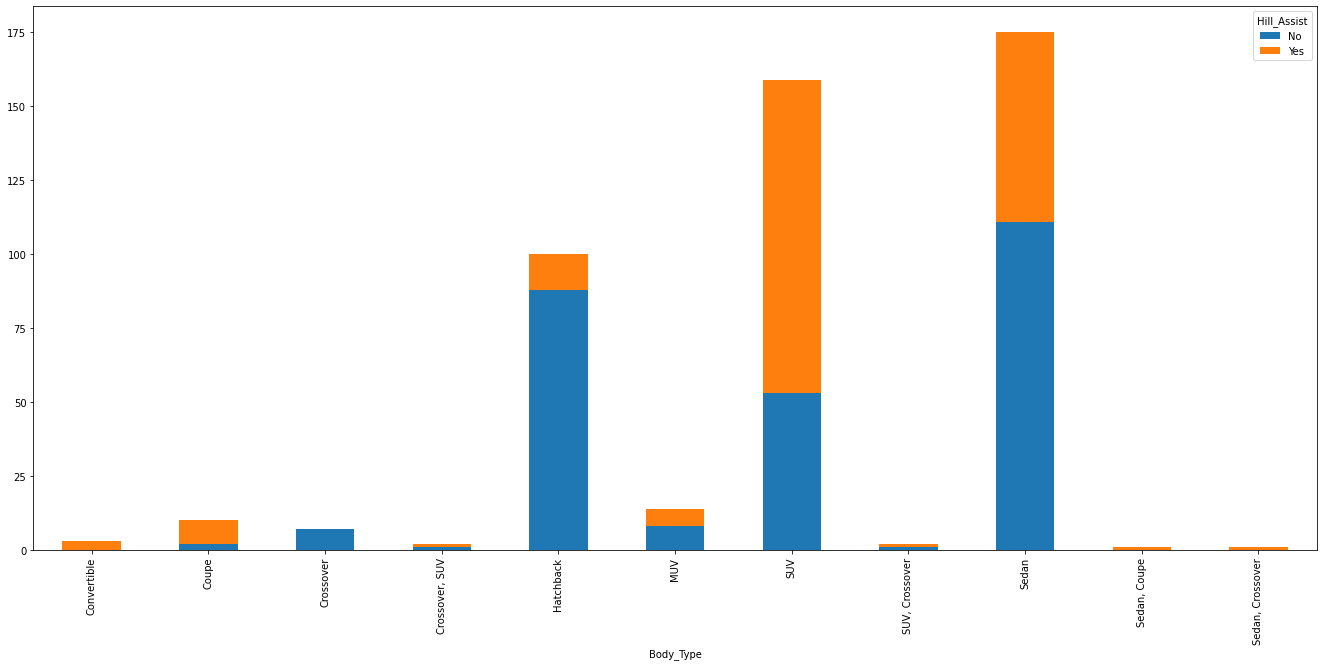

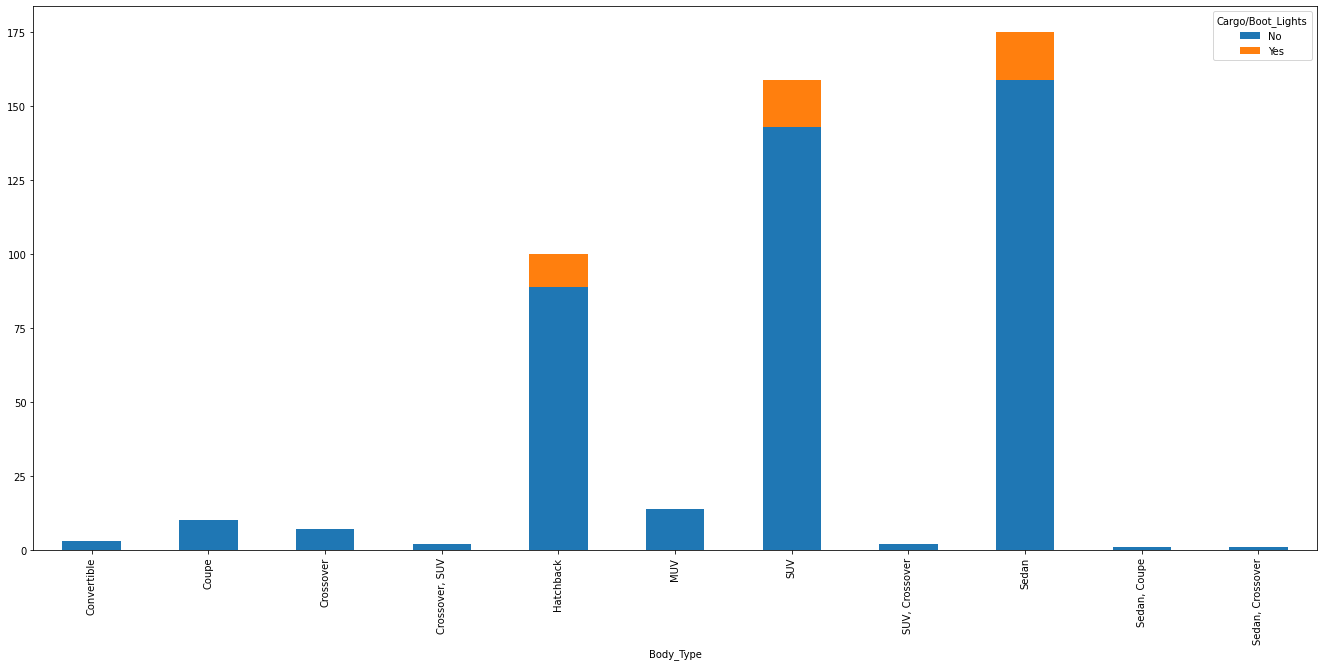

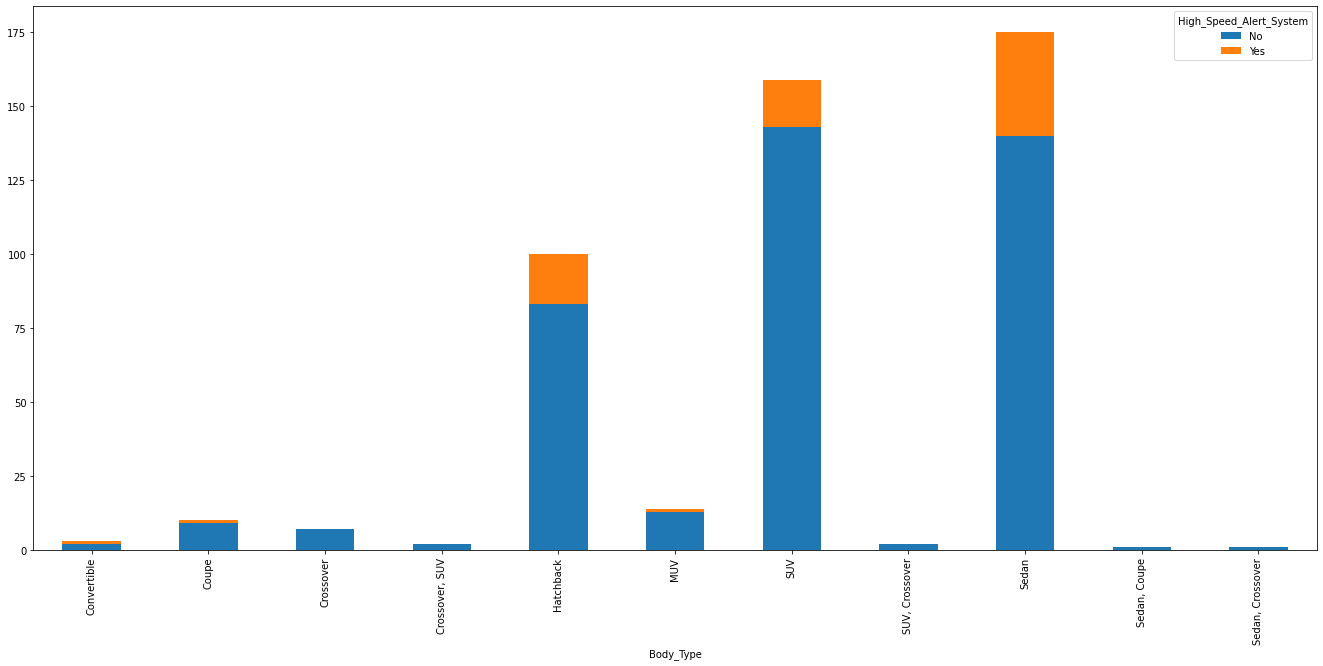

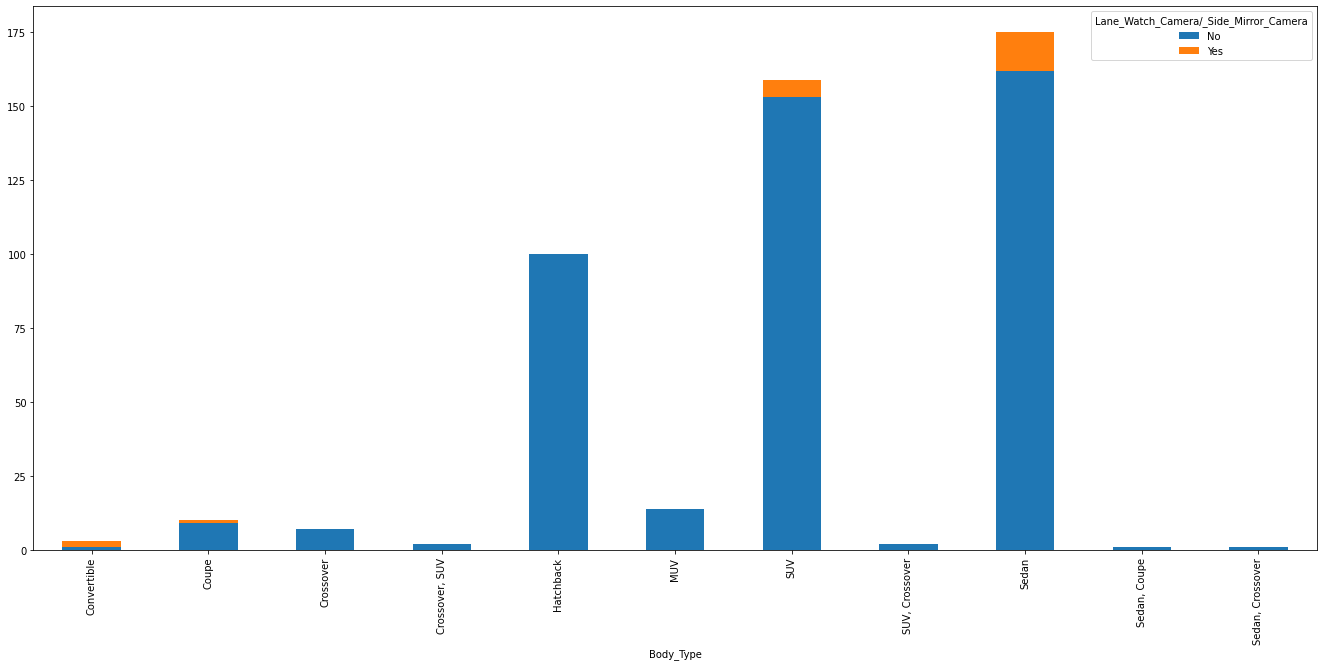

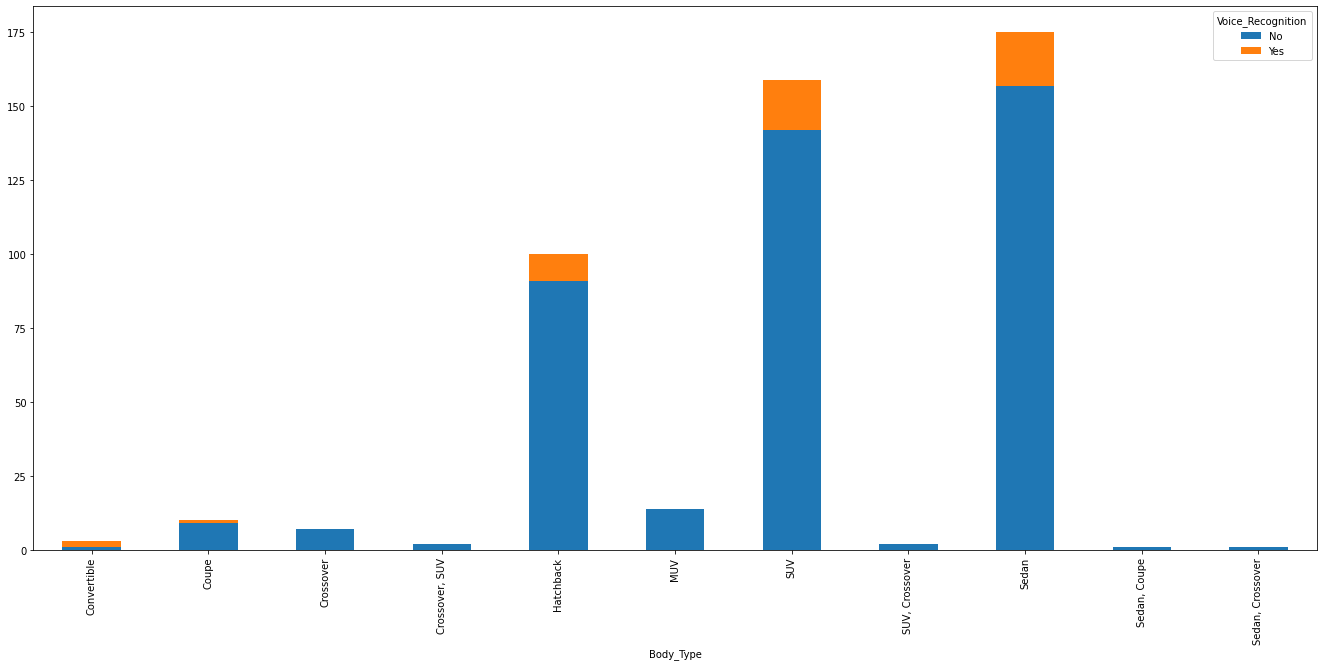

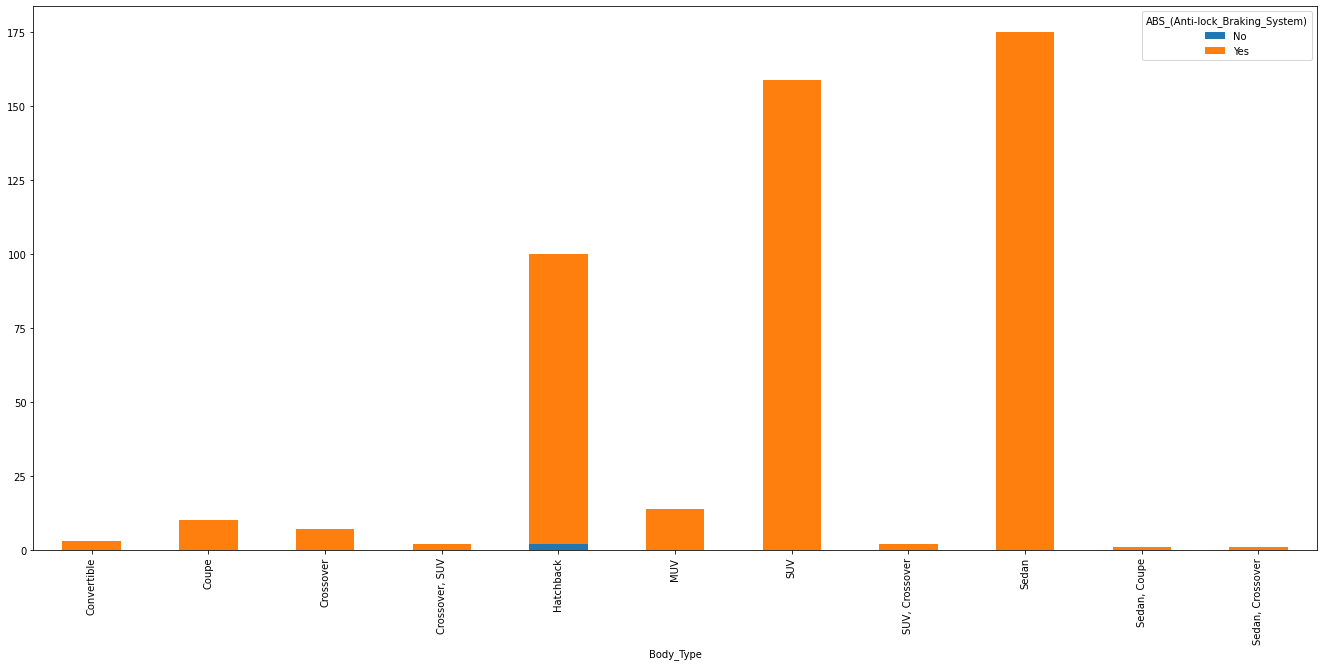

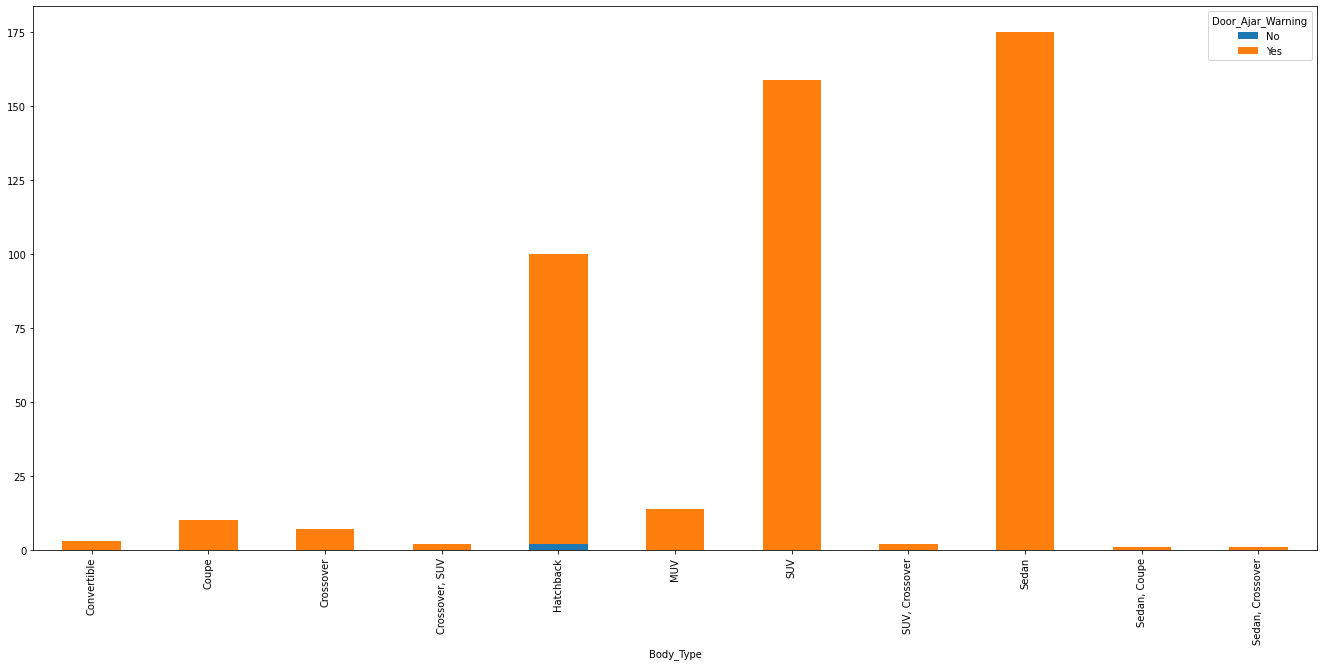

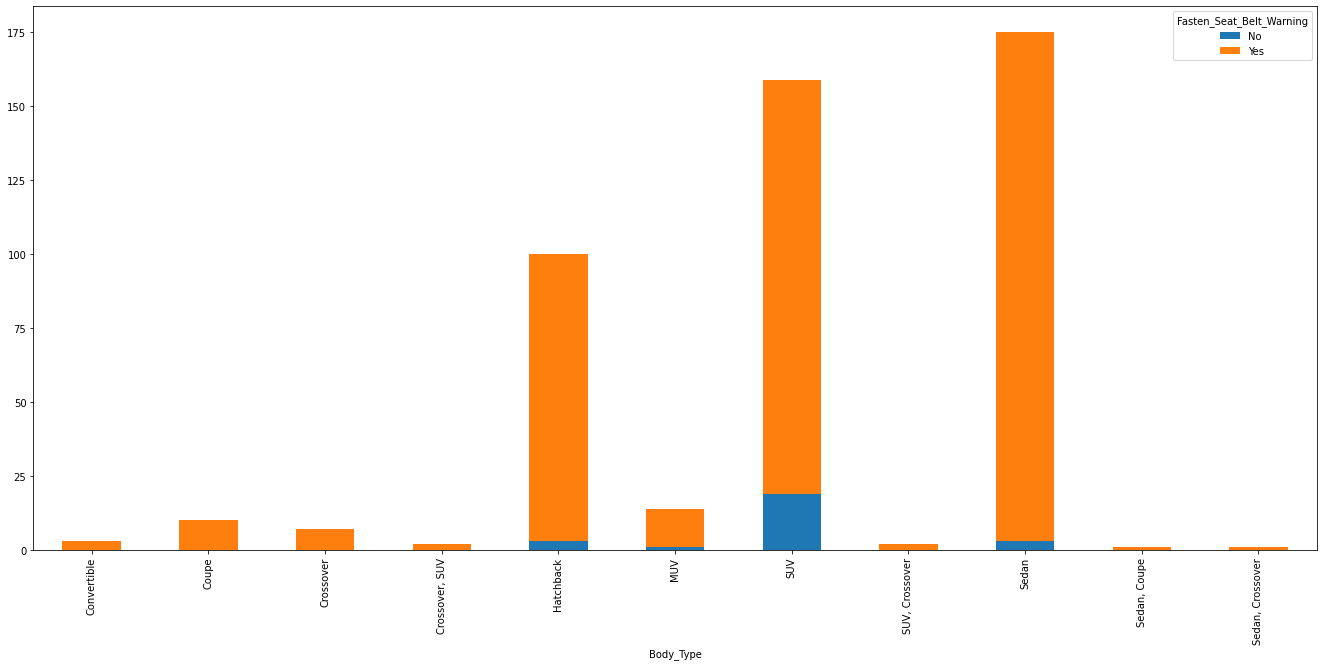

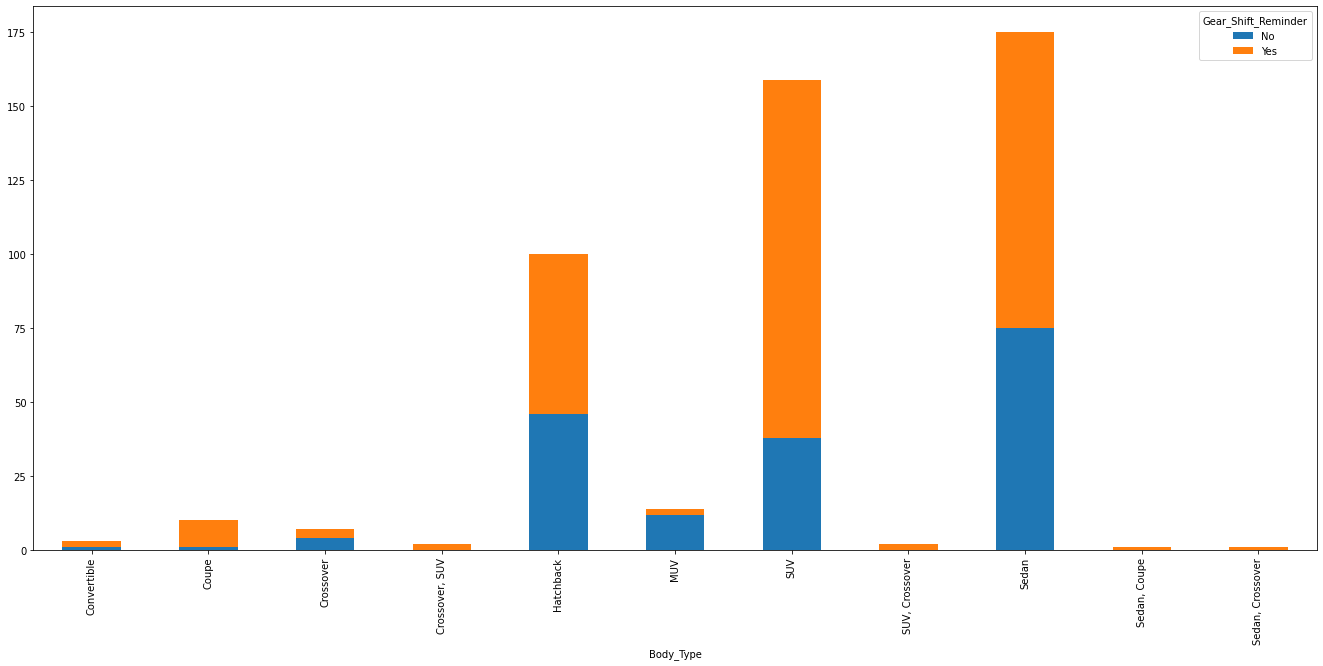

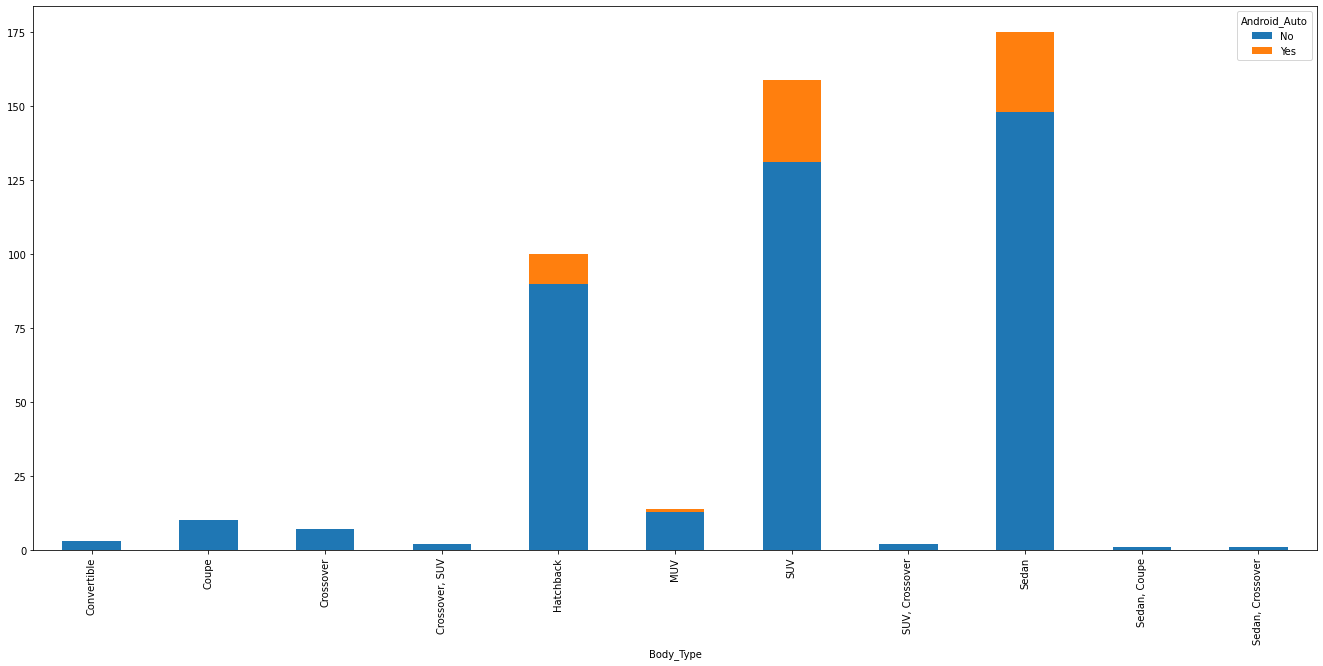

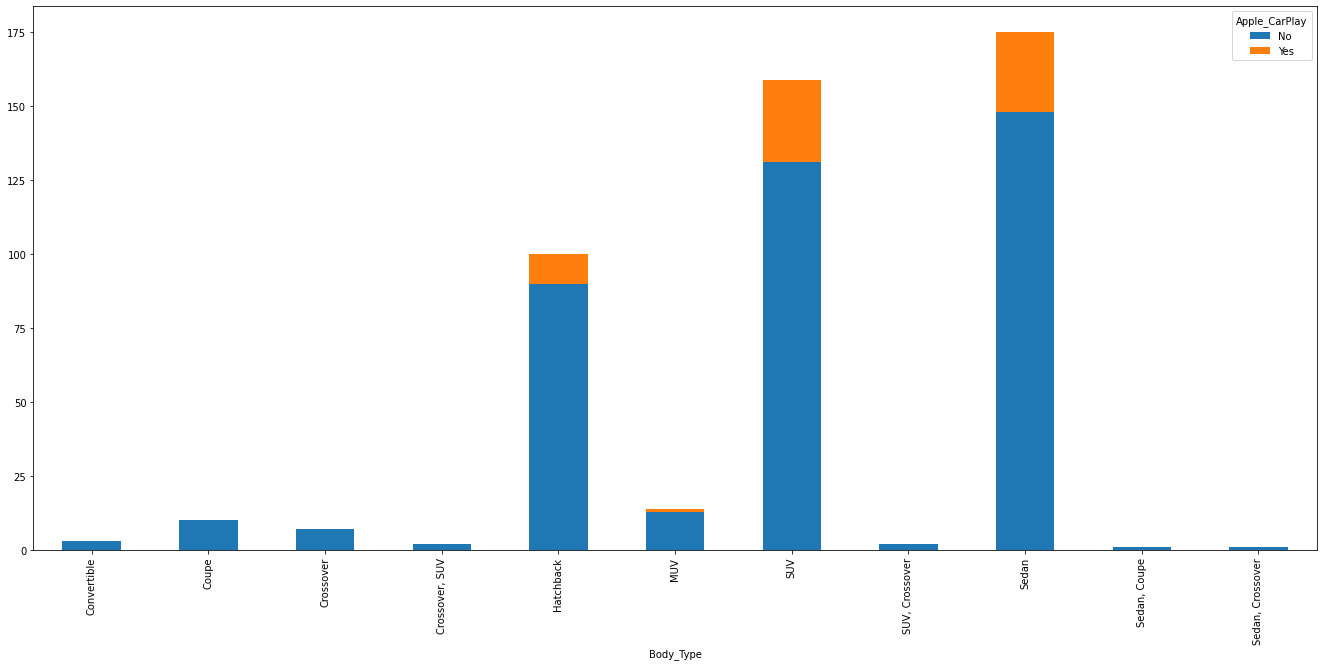

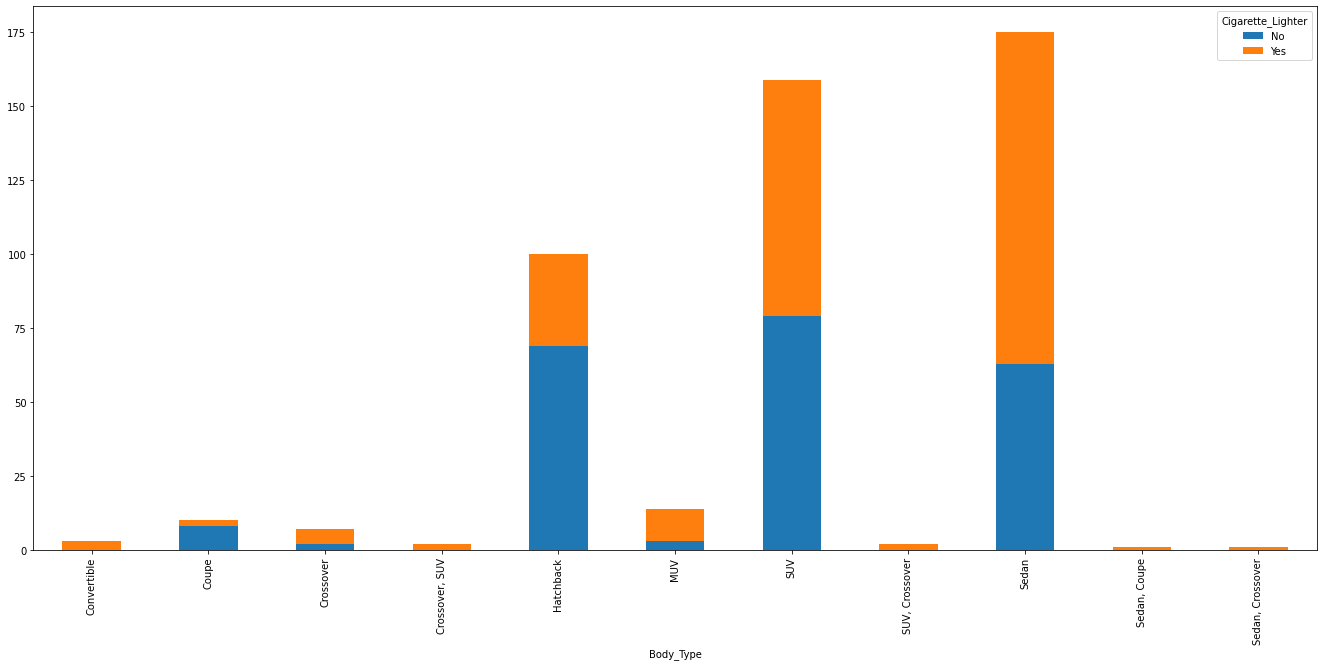

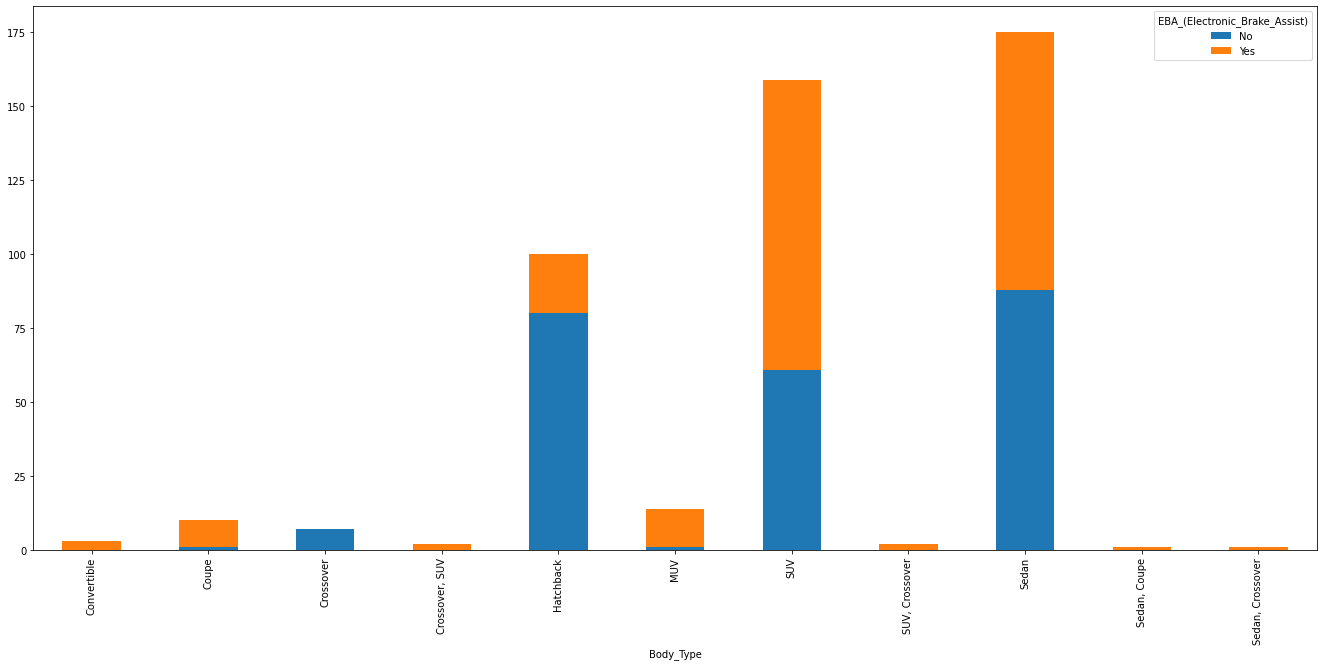

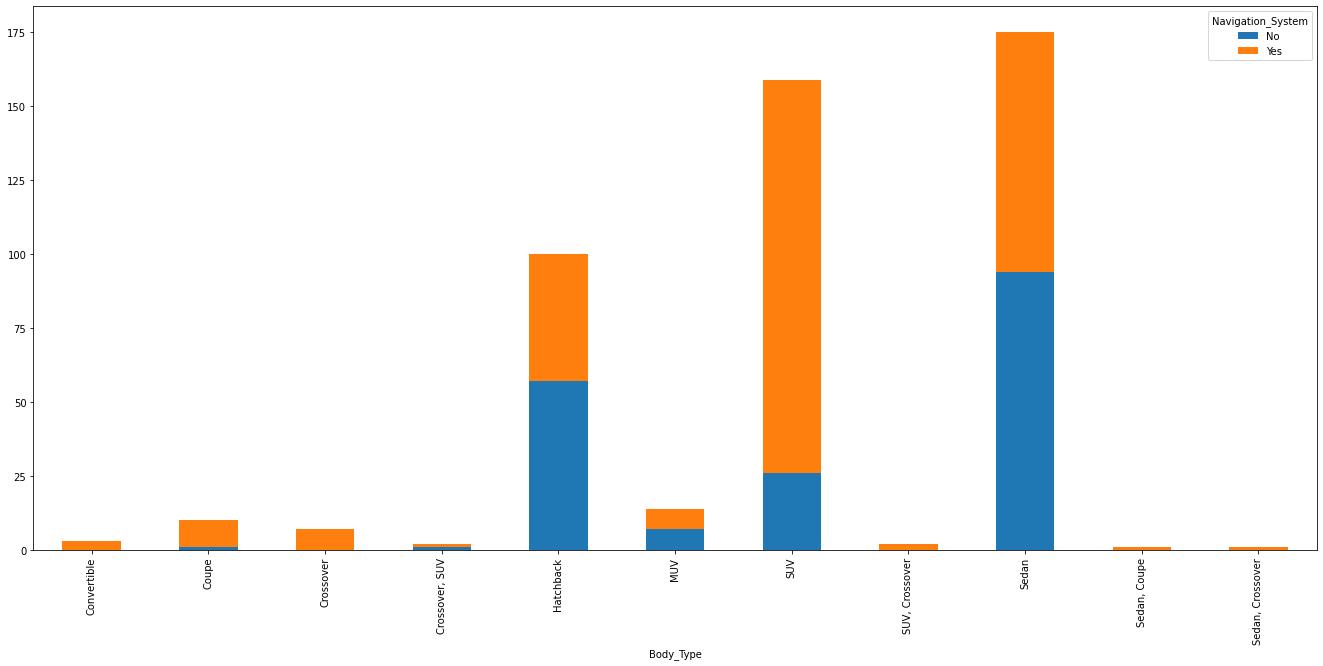

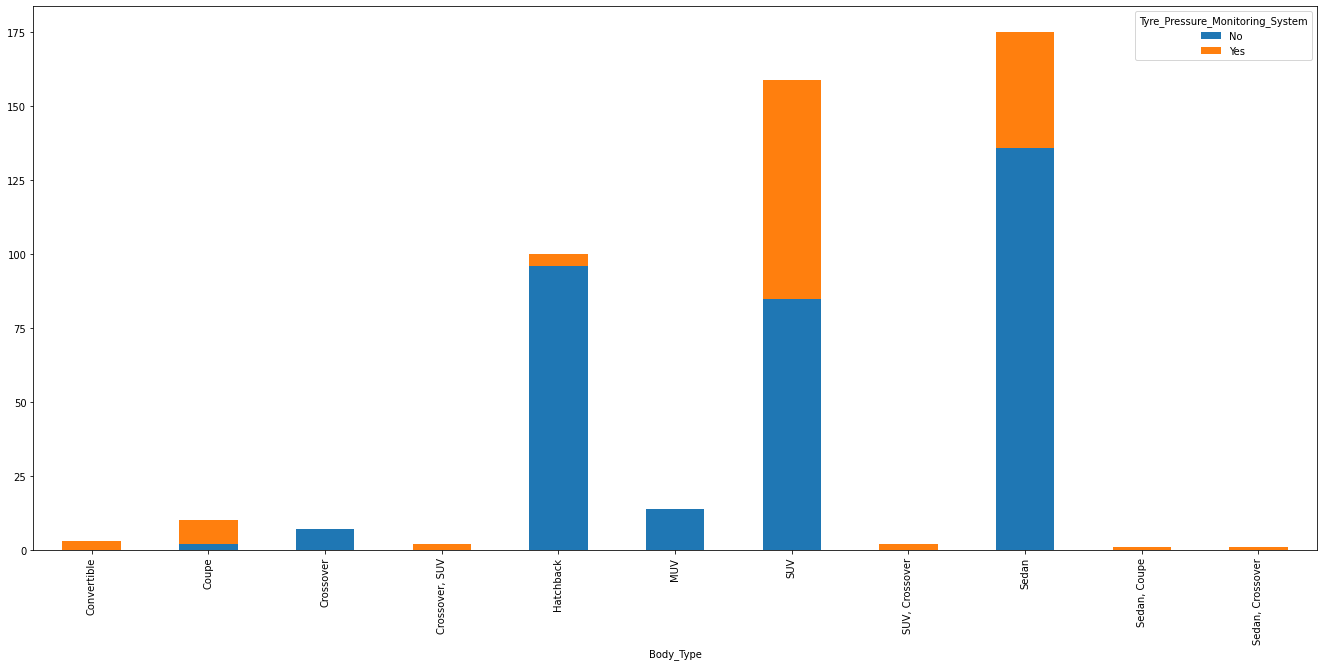

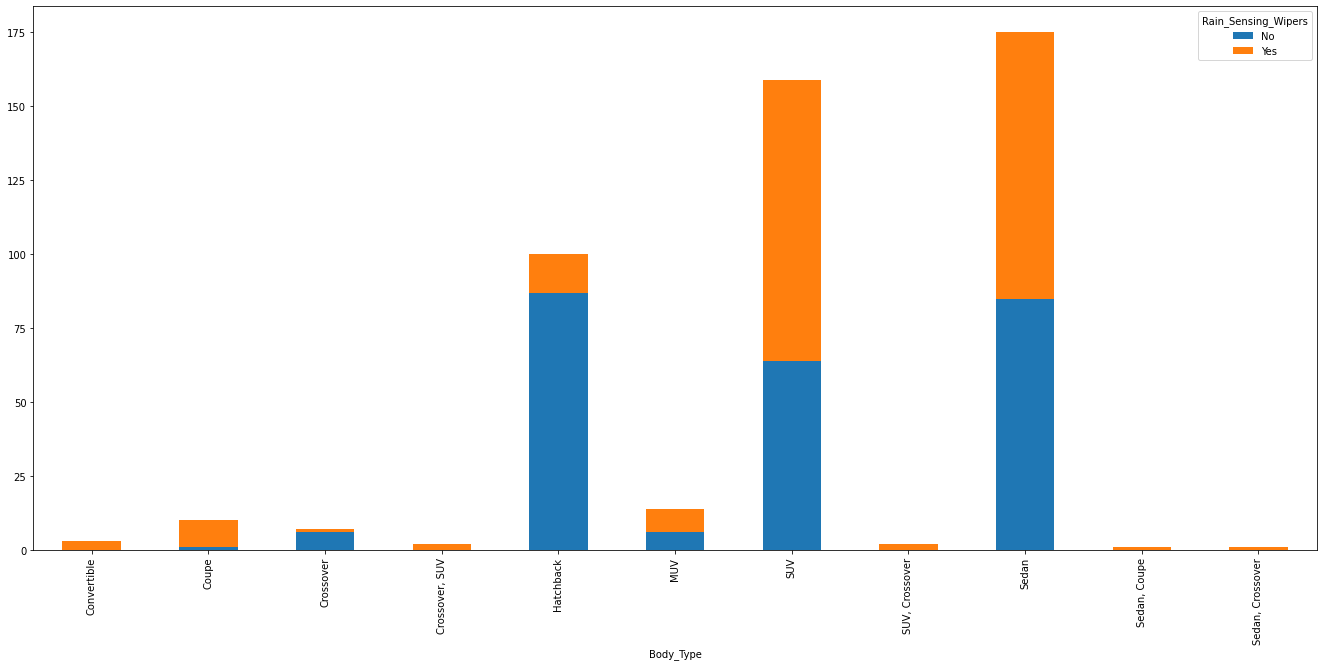

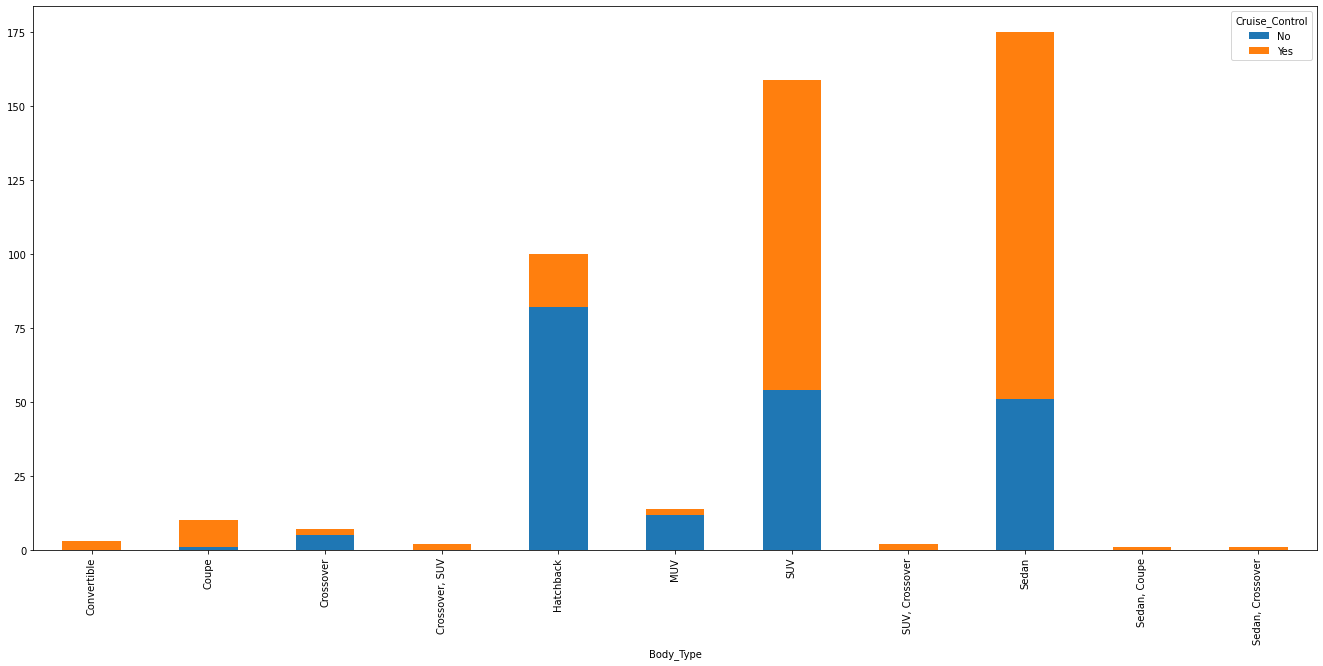

In [170]:
pd.crosstab(df['Body_Type'],df['Ambient_Lightning']).plot.bar(stacked=True)

pd.crosstab(df['Body_Type'],df['Hill_Assist']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Cargo/Boot_Lights']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['High_Speed_Alert_System']).plot.bar(stacked=True)

pd.crosstab(df['Body_Type'],df['Lane_Watch_Camera/_Side_Mirror_Camera']).plot.bar(stacked=True)

pd.crosstab(df['Body_Type'],df['Voice_Recognition']).plot.bar(stacked=True)

pd.crosstab(df['Body_Type'],df['ABS_(Anti-lock_Braking_System)']).plot.bar(stacked=True)

pd.crosstab(df['Body_Type'],df['Door_Ajar_Warning']).plot.bar(stacked=True)

pd.crosstab(df['Body_Type'],df['Fasten_Seat_Belt_Warning']).plot.bar(stacked=True)

pd.crosstab(df['Body_Type'],df['Gear_Shift_Reminder']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Android_Auto']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Apple_CarPlay']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Cigarette_Lighter']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['EBA_(Electronic_Brake_Assist)']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Navigation_System']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Tyre_Pressure_Monitoring_System']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Rain_Sensing_Wipers']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Cruise_Control']).plot.bar(stacked=True)

##Findings:
*   SUVs and Sedans have ambient lighting in about 10 models
*   All Convertibles, Sedan coupes and sedan convertibles have Hill-Assist, with Coupes and SUVs having it in the majority. Crossovers do not have this
*   Only 37 cars have Cargo/Boot Lights
*   Sedans have the highest range of cars with High-speed alert system >25
*   Convertibles have the majority with Lane watch/sid mirror camera
*   Voice-recognition system is most widely available in sedans
*   Except for 2 Hatchbacks, all have an Anti-lock Braking System and Door ajar warning system
*   The gear-shift reminder is majorly absent in MUVs
*   Android Auto and Apple Carplay is only seen in a few Hatchbacks, MUVs, Sedans and SUVs
*   8/10 Coupes do not have a Cigarette lighter
*   No crossovers have Electronic Brake Assist
*   Sedans>Hatchbacks>SUVs without Tyre Pressure Monitoring system
*   Hatchbacks and Crossovers are majorly without Rain-sensing Wipers
* Sedans have moe cars with Cruise Control than SUVs





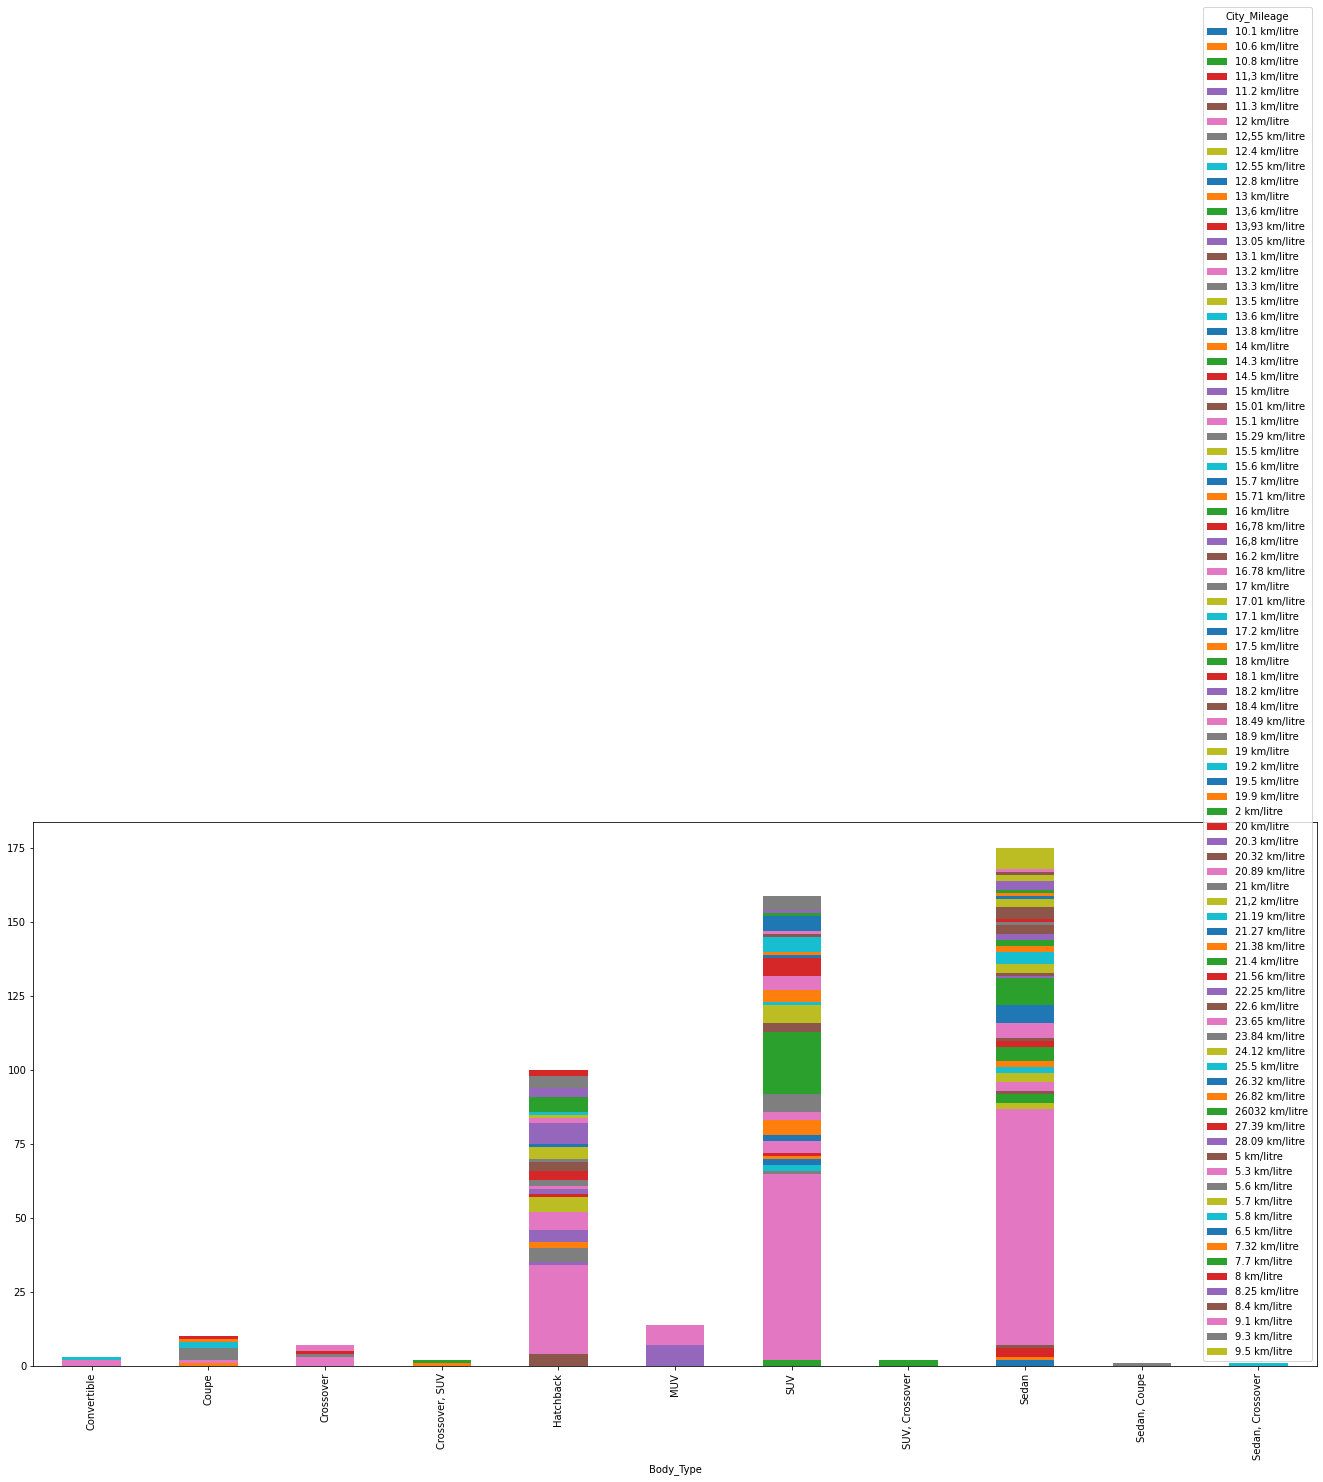

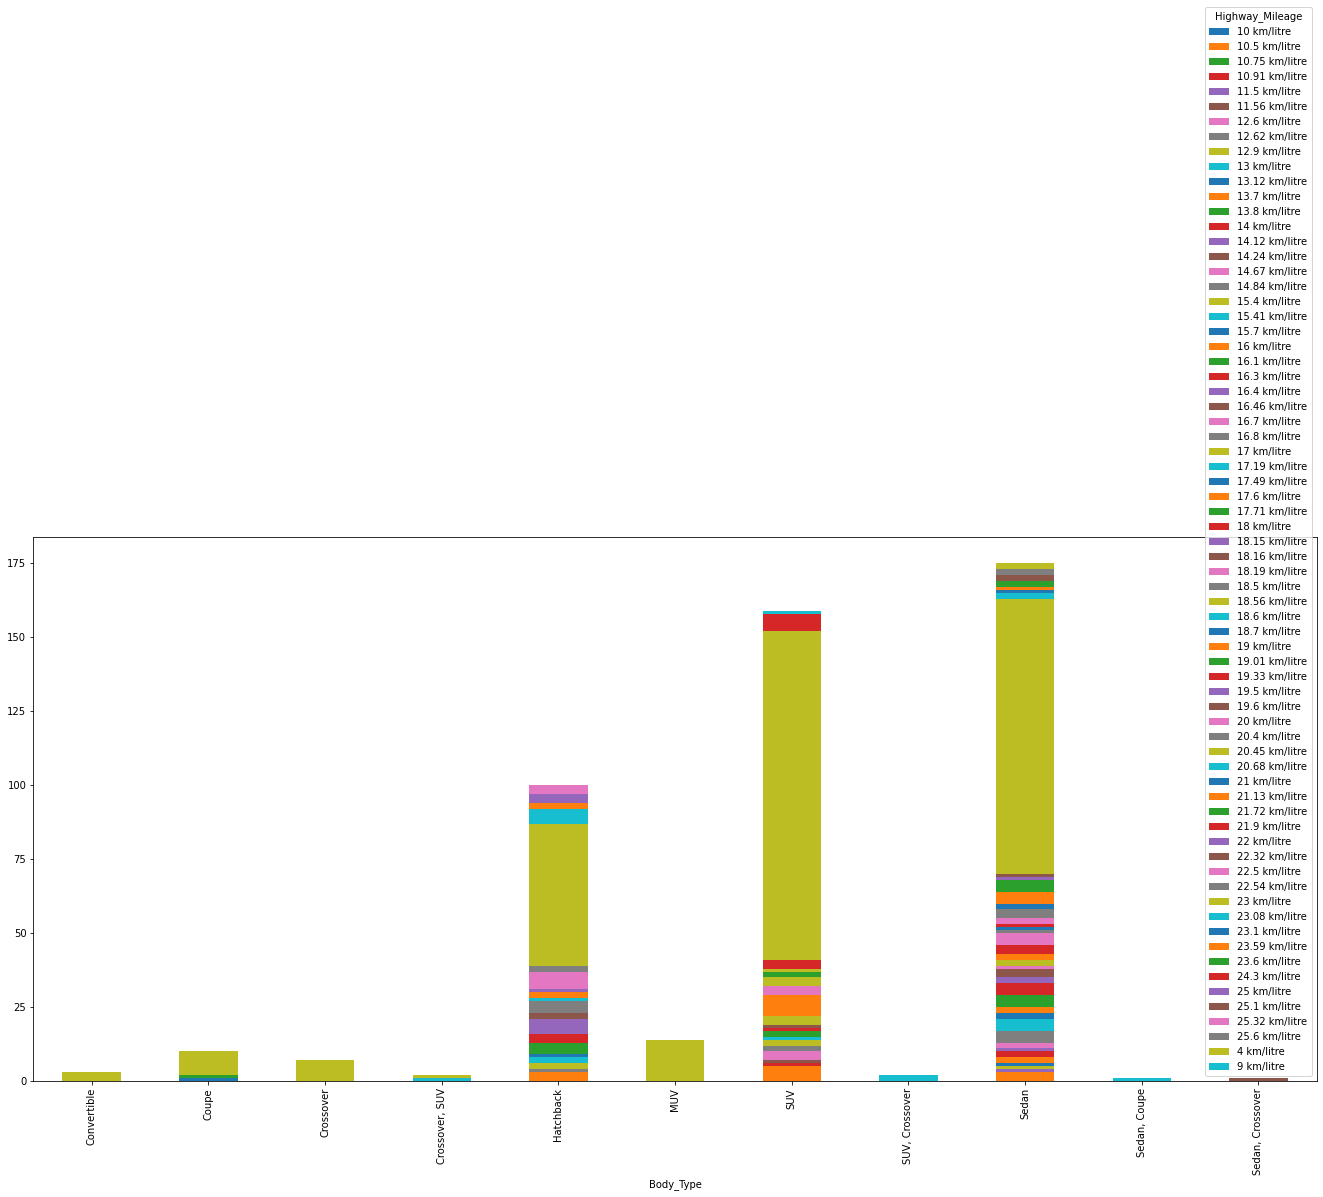

In [171]:
pd.crosstab(df['Body_Type'],df['City_Mileage']).plot.bar(stacked=True)
pd.crosstab(df['Body_Type'],df['Highway_Mileage']).plot.bar(stacked=True)



Most widely-found Mileage:
*   City Mileage: 12 Km/Litres for 194 cars, highest in Sedans
*   Highway Mileage: 23 Km/Litre for 300 cars, highest in Suvs
*   Sedan, coupe shares similar mileage for city and highway at 9 and 9.8 Km/L






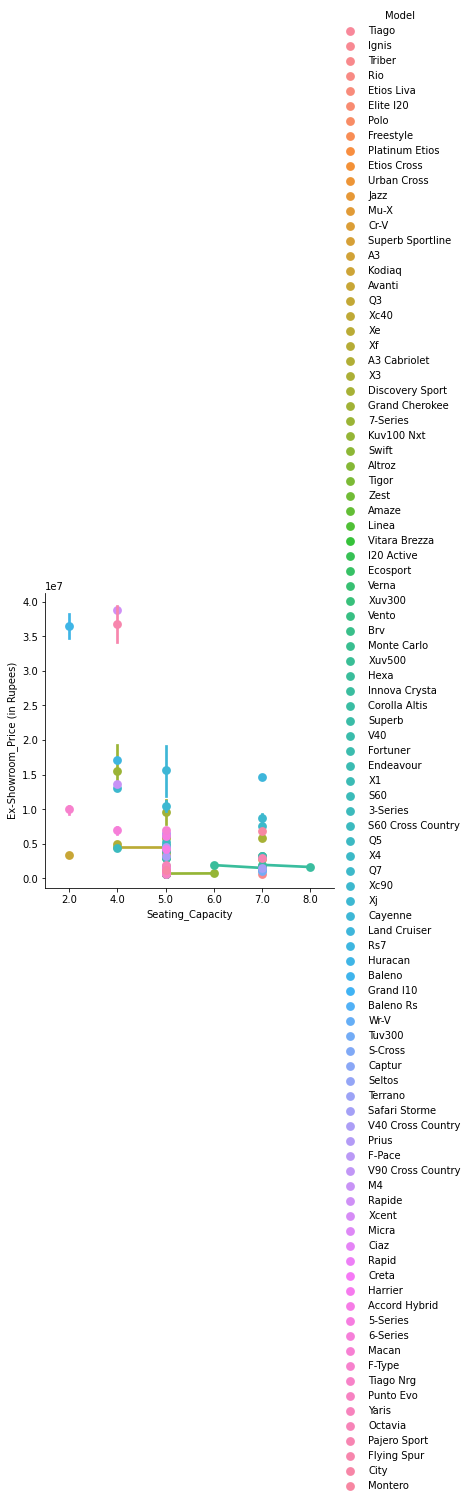

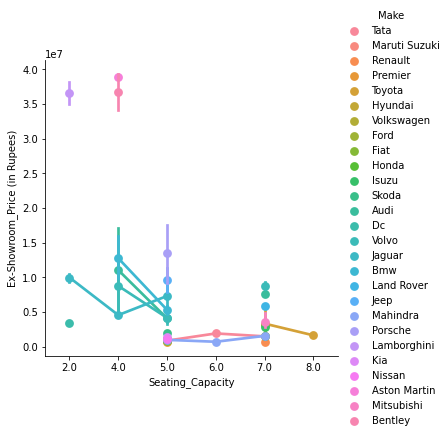

In [172]:
sns.catplot(data=df, y="Ex-Showroom_Price (in Rupees)", x="Seating_Capacity" , hue="Model" ,kind="point")
sns.catplot(data=df, y="Ex-Showroom_Price (in Rupees)", x="Seating_Capacity" , hue="Make" ,kind="point")




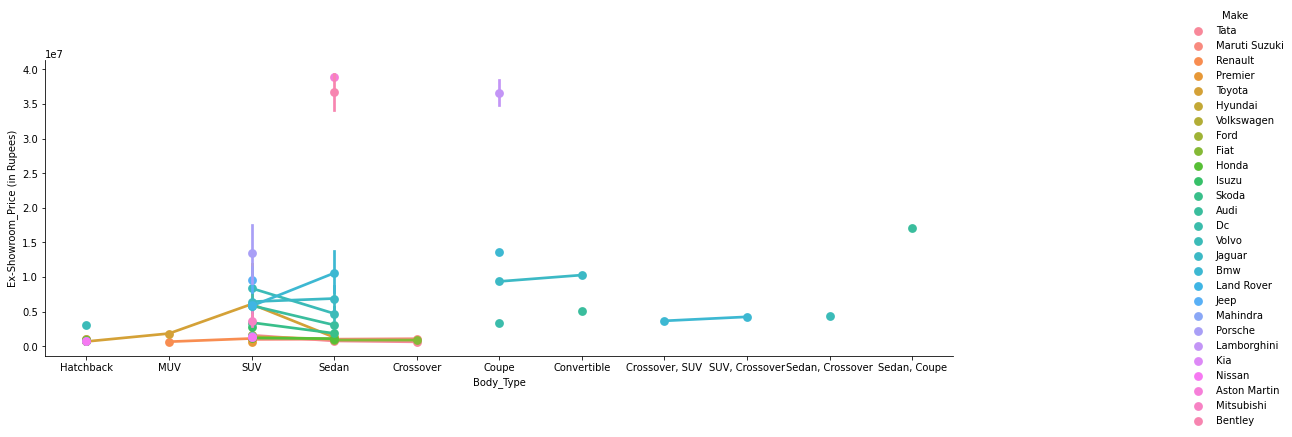

In [173]:
g5=sns.catplot(data=df, y="Ex-Showroom_Price (in Rupees)", x="Body_Type" , hue="Make" ,kind="point")
g5.fig.set_figwidth(20)
g5.fig.set_figheight(5)

##Findings:
*   Hyundai provides the highest seating capacity(8) at the least price. On the opposite end is a Lamborghini 2-seater.
*   7 seaters are available across a variety of Makers. 4 seaters are primarily by BMW
*   Jaguar, Audi, Volvo, BMW are the only ones that have ventured into the Convertible, Crossover+SUV/Sedan and Sedan coupe segment
*     Body type V/s Price
                            Cheapest   Priciest
          Hatchback:        TATA       Volvo
          MUV:              Renault    Toyota
          SUV:              Premier    Porsche
          Sedan:            Toyota     Bentley
          Crossover:        TATA       Maruti Suzuki
          Coupe:            Jaguar     Lamborghini
          Covertible:       Audi       Jaguar
          Crossover,SUV:    BMW        BMW
          Crossover,Sedan: Volvo
          Sedan,Coupe:  Audi








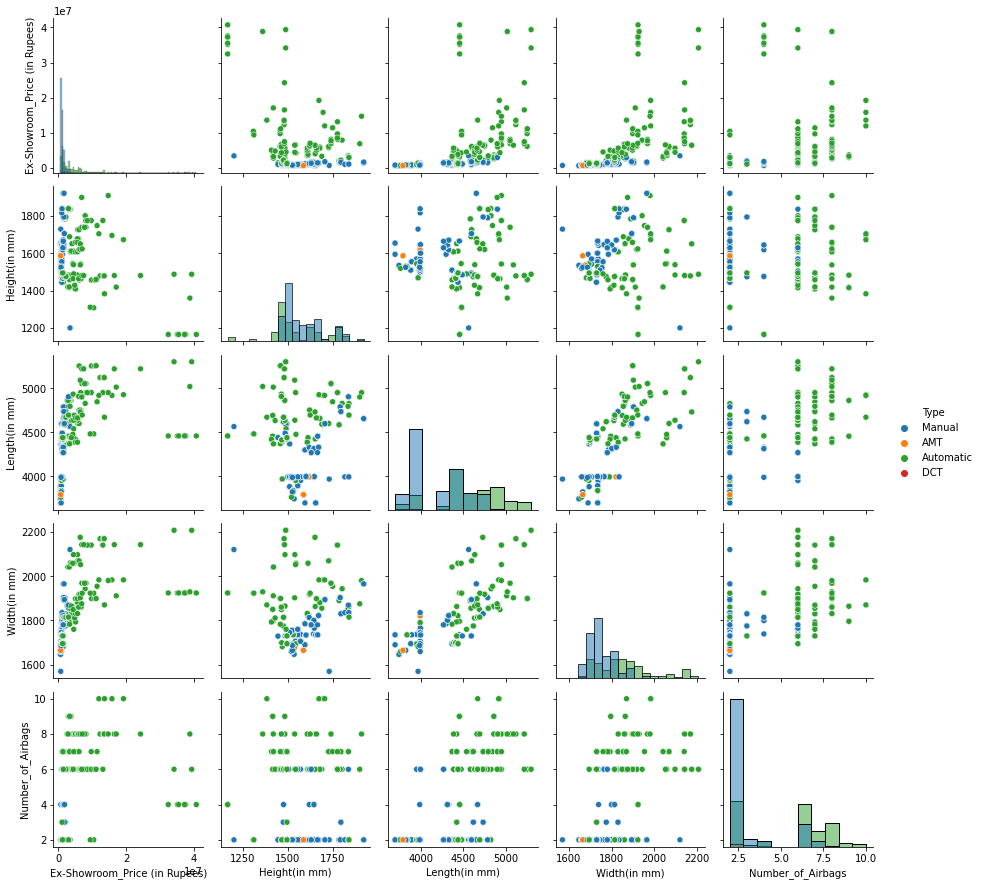

In [174]:
g = sns.pairplot(df[["Ex-Showroom_Price (in Rupees)", "Height(in mm)", "Length(in mm)", "Width(in mm)","City_Mileage", "Highway_Mileage",
                                'Extended_Warranty','Number_of_Airbags','Type']], hue="Type", diag_kind="hist")
	



##Findings:
*   Length increases with width
*   Number of airbags>5 for most Automatic type cars
*   Number of airbags does not vary with increase in Price,i.e, even the cars with highest number of airbags are available in the mid-range.
*  Manual and Automatic cars share similarities in terms of Width and Height





